## 0.SETTING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as rc
import numpy as np
import seaborn as sns
import geopandas as gpd
import folium
import plotly.express as px
from folium import GeoJson
from shapely.geometry import MultiPolygon, Polygon
# import Point

In [ ]:
#한글깨짐 현상 - 설치 - 런타임- 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 런타임 다시 시작 후 해당 문구 실행
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 1. PropertyM (1Q ~ 3Q)
#####(서울(연립,다세대,오피스텔))- 부동산 시세와 공동주택공시가격(1Q~3Q)

In [ ]:
propm1 = pd.read_csv("/content/drive/MyDrive/PropertyM")
propm1.drop(['Unnamed: 0'],axis=1,inplace = True) # 'Unnamed: 0' 열 제거해야함.
propm2 = propm1.drop(range(0,63),axis=0)
propm2.shape

(1914221, 10)

In [ ]:
propm2['ESTT_CURPRC_SMNT_AMT'] = propm2['ESTT_CURPRC_SMNT_AMT'] *10000

In [ ]:
print(propm2['SIGNGU_NM'].unique())
print(propm2['Dong'].unique())

[' 강남구' ' 강동구' ' 강북구' ' 강서구' ' 관악구' ' 광진구' ' 구로구' ' 금천구' ' 노원구' ' 도봉구'
 ' 동대문' ' 동작구' ' 마포구' ' 서대문' ' 서초구' ' 성동구' ' 성북구' ' 송파구' ' 양천구' ' 영등포'
 ' 용산구' ' 은평구' ' 종로구' ' 중구' ' 중랑구']
['역삼동' '개포동' '청담동' '삼성동' '대치동' '신사동' '논현동' '세곡동' '자곡동' '율현동' '일원동' '도곡동'
 '명일동' '고덕동' '상일동' '길동' '둔촌동' '암사동' '성내동' '천호동' '미아동' '번동' '수유동' '우이동'
 '염창동' '등촌동' '화곡동' '가양동' '마곡동' '내발산동' '외발산동' '공항동' '방화동' '개화동' '봉천동' '신림동'
 '남현동' '중곡동' '능동' '구의동' '광장동' '자양동' '화양동' '군자동' '신도림동' '구로동' '가리봉동' '고척동'
 '개봉동' '오류동' '궁동' '온수동' '천왕동' '항동' '가산동' '독산동' '시흥동' '월계동' '공릉동' '하계동'
 '상계동' '중계동' '쌍문동' '방학동' '창동' '도봉동' '신설동' '용두동' '제기동' '전농동' '답십리동' '장안동'
 '청량리동' '회기동' '휘경동' '이문동' '노량진동' '상도동' '상도1동' '본동' '흑석동' '동작동' '사당동' '대방동'
 '신대방동' '아현동' '공덕동' '신공덕동' '도화동' '용강동' '토정동' '마포동' '대흥동' '염리동' '노고산동'
 '신수동' '현석동' '구수동' '창전동' '상수동' '하중동' '당인동' '서교동' '동교동' '합정동' '망원동' '연남동'
 '성산동' '중동' '상암동' '충정로2가' '충정로3가' '합동' '냉천동' '천연동' '옥천동' '영천동' '북아현동'
 '홍제동' '대현동' '대신동' '신촌동' '봉원동' '창천동' '연희동' '홍은동' '북가좌동' '남가좌동' '방배동' '양재동'
 '우면동' '잠원동' '반포동' '서초

In [ ]:
pm1[pm1['Dong']=='율현동'].head()

,SIGNLE,CTPR_NM,SIGNGU_NM,Dong,Bun,APHUS_POTVALE,ESTT_CURPRC_SMNT_AMT,XU_DIMS,LA,LO
79618,11680 11300,서울특별시,강남구,율현동,196-86번지,422000000.0,0.0,59.99,37.472068,127.108992
79619,11680 11300,서울특별시,강남구,율현동,196-86번지,430000000.0,0.0,59.99,37.472068,127.108992
79620,11680 11300,서울특별시,강남구,율현동,196-86번지,524000000.0,0.0,76.90,37.472068,127.108992
79621,11680 11300,서울특별시,강남구,율현동,196-86번지,534000000.0,0.0,76.90,37.472068,127.108992
79622,11680 11300,서울특별시,강남구,율현동,309-25번지,295000000.0,0.0,29.75,37.470989,127.105055


In [ ]:
pm1 = propm2[propm2['SIGNGU_NM']==' 강남구']
pm2 = propm2[propm2['SIGNGU_NM']==' 강동구']
pm3 = propm2[propm2['SIGNGU_NM']==' 강북구']
pm4 = propm2[propm2['SIGNGU_NM']==' 강서구']
pm5 = propm2[propm2['SIGNGU_NM']==' 관악구']
pm6 = propm2[propm2['SIGNGU_NM']==' 광진구']
pm7 = propm2[propm2['SIGNGU_NM']==' 구로구']
pm8 = propm2[propm2['SIGNGU_NM']==' 금천구']
pm9 = propm2[propm2['SIGNGU_NM']==' 노원구']
pm10 = propm2[propm2['SIGNGU_NM']==' 도봉구']
pm11 = propm2[propm2['SIGNGU_NM']==' 동대문']
pm12 = propm2[propm2['SIGNGU_NM']==' 동작구']
pm13 = propm2[propm2['SIGNGU_NM']==' 마포구']
pm14 = propm2[propm2['SIGNGU_NM']==' 서대문']
pm15 = propm2[propm2['SIGNGU_NM']==' 서초구']
pm16 = propm2[propm2['SIGNGU_NM']==' 성동구']
pm17 = propm2[propm2['SIGNGU_NM']==' 성북구']
pm18 = propm2[propm2['SIGNGU_NM']==' 송파구']
pm19 = propm2[propm2['SIGNGU_NM']==' 양천구']
pm20 = propm2[propm2['SIGNGU_NM']==' 영등포']
pm21 = propm2[propm2['SIGNGU_NM']==' 용산구']
pm22 = propm2[propm2['SIGNGU_NM']==' 은평구']
pm23 = propm2[propm2['SIGNGU_NM']==' 종로구']
pm24 = propm2[propm2['SIGNGU_NM']==' 중구']
pm25 = propm2[propm2['SIGNGU_NM']==' 중랑구']

In [ ]:
propm2.head()

,SIGNLE,CTPR_NM,SIGNGU_NM,Dong,Bun,APHUS_POTVALE,ESTT_CURPRC_SMNT_AMT,XU_DIMS,LA,LO
63,11680 10100,서울특별시,강남구,역삼동,817-25번지,177000000.0,2.617272e+08,20.7,37.500256,127.028755
64,11680 10100,서울특별시,강남구,역삼동,817-25번지,181000000.0,2.676420e+08,20.7,37.500256,127.028755
65,11680 10100,서울특별시,강남구,역삼동,817-25번지,177000000.0,2.617272e+08,20.7,37.500256,127.028755
66,11680 10100,서울특별시,강남구,역삼동,817-25번지,177000000.0,2.617272e+08,20.7,37.500256,127.028755
67,11680 10100,서울특별시,강남구,역삼동,817-25번지,181000000.0,2.676420e+08,20.7,37.500256,127.028755


<ipython-input-10-e6225e604fbb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  propm3 = propm2.groupby('SIGNGU_NM').mean()


<Axes: xlabel='서울 자치구'>

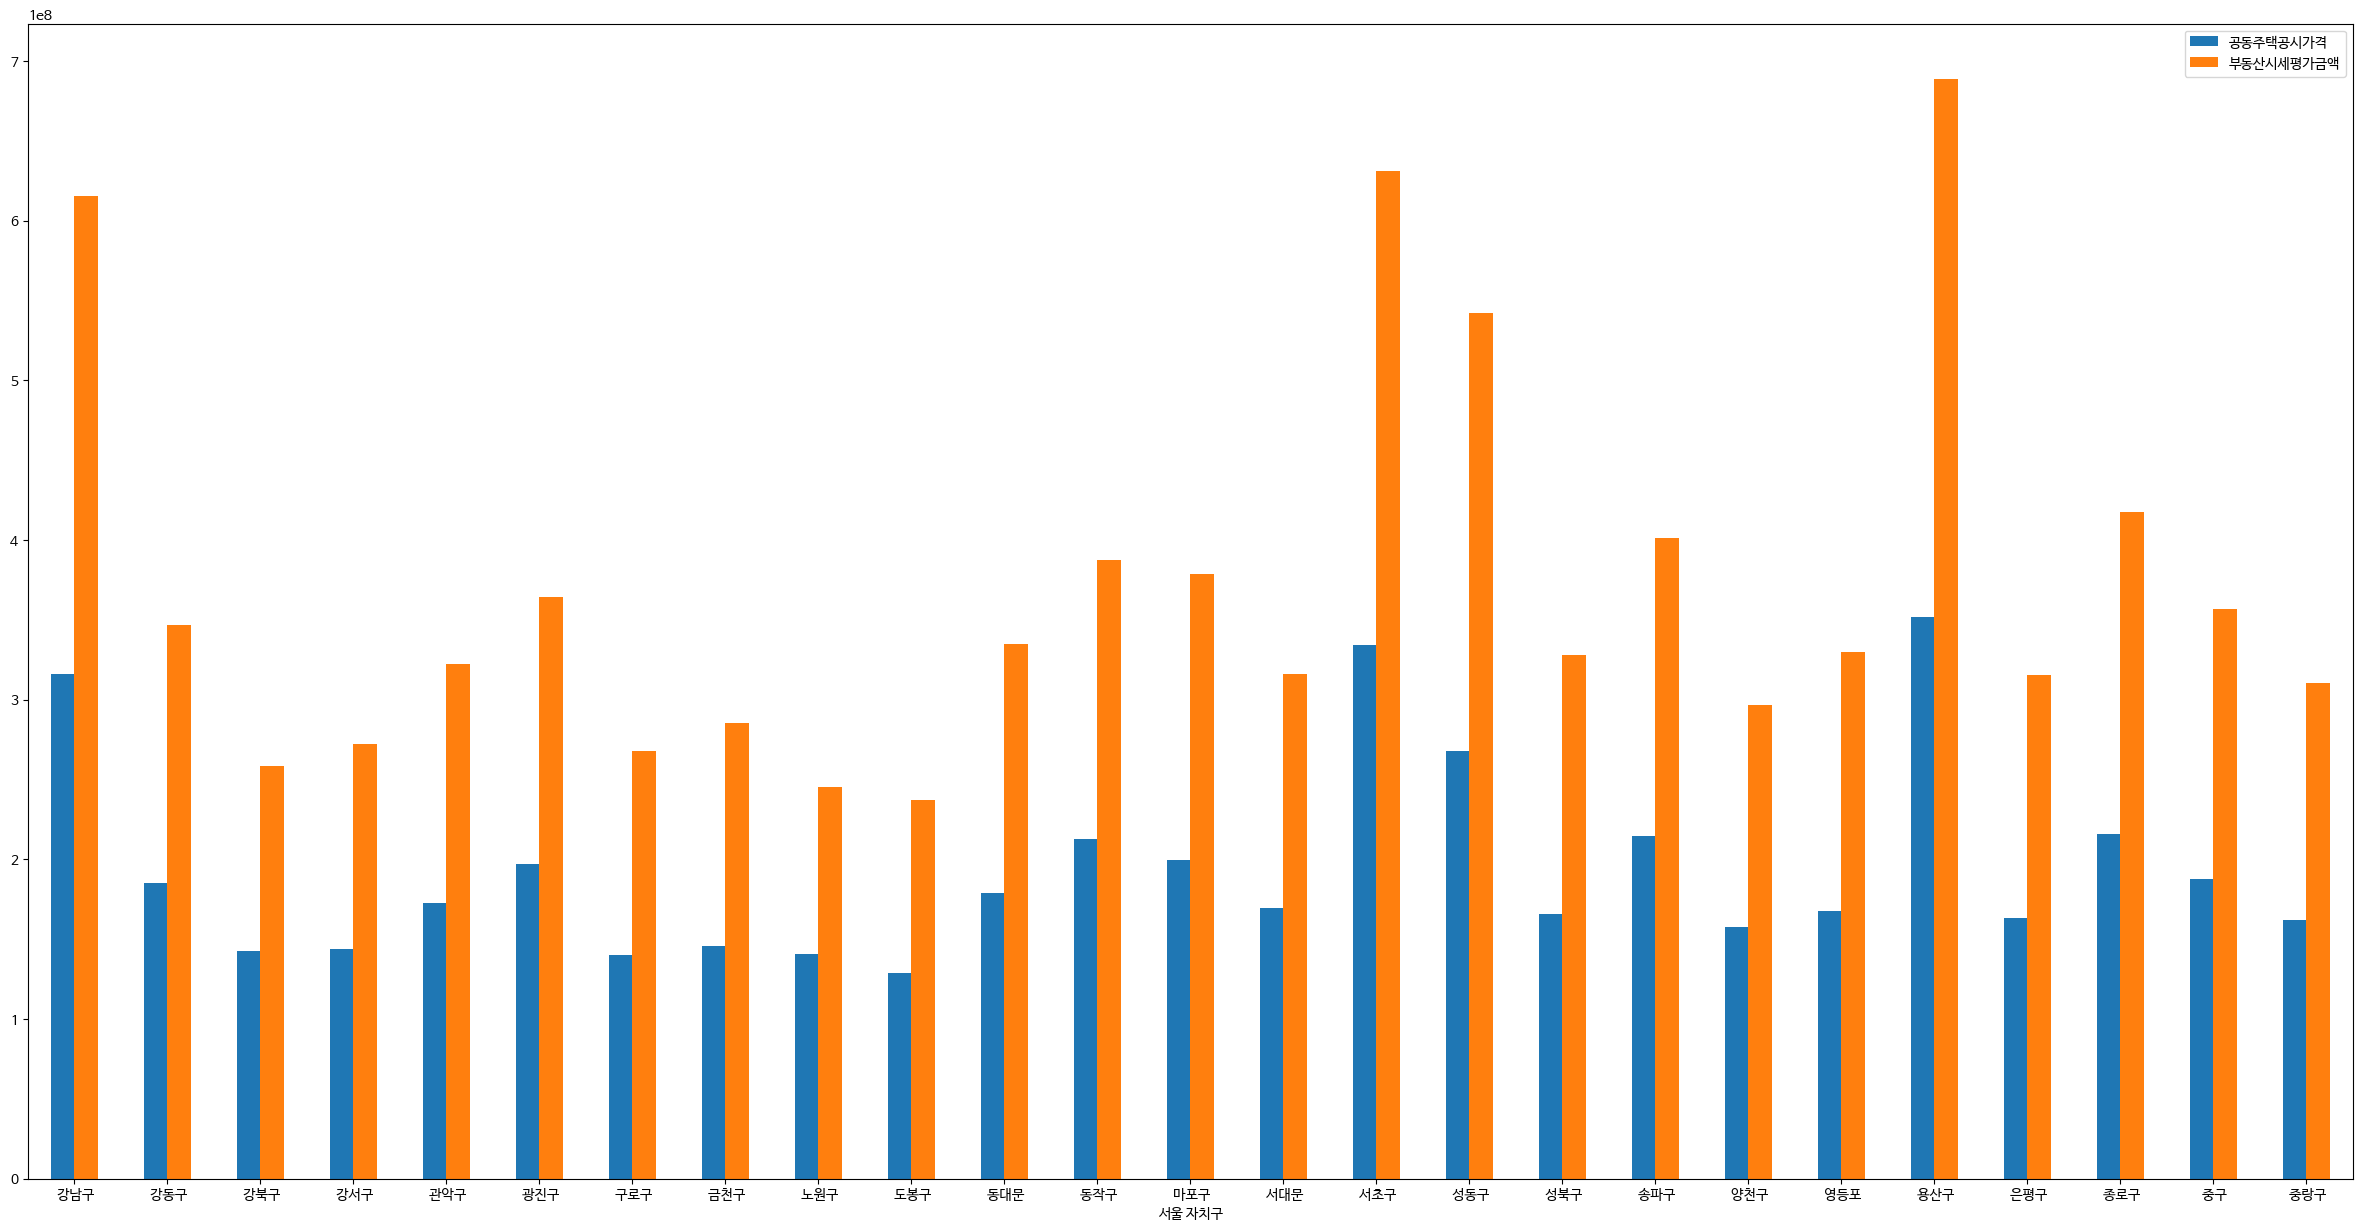

In [ ]:
propm3 = propm2.groupby('SIGNGU_NM').mean()
propm3.plot(y=['APHUS_POTVALE','ESTT_CURPRC_SMNT_AMT'],label=['공동주택공시가격','부동산시세평가금액'],
            kind='bar', rot=0 , figsize=(30,15), xlabel = '서울 자치구')

<ipython-input-35-2f102ec97a61>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  propm3 = pm25.groupby('Dong').mean()


<Axes: xlabel='중랑구'>

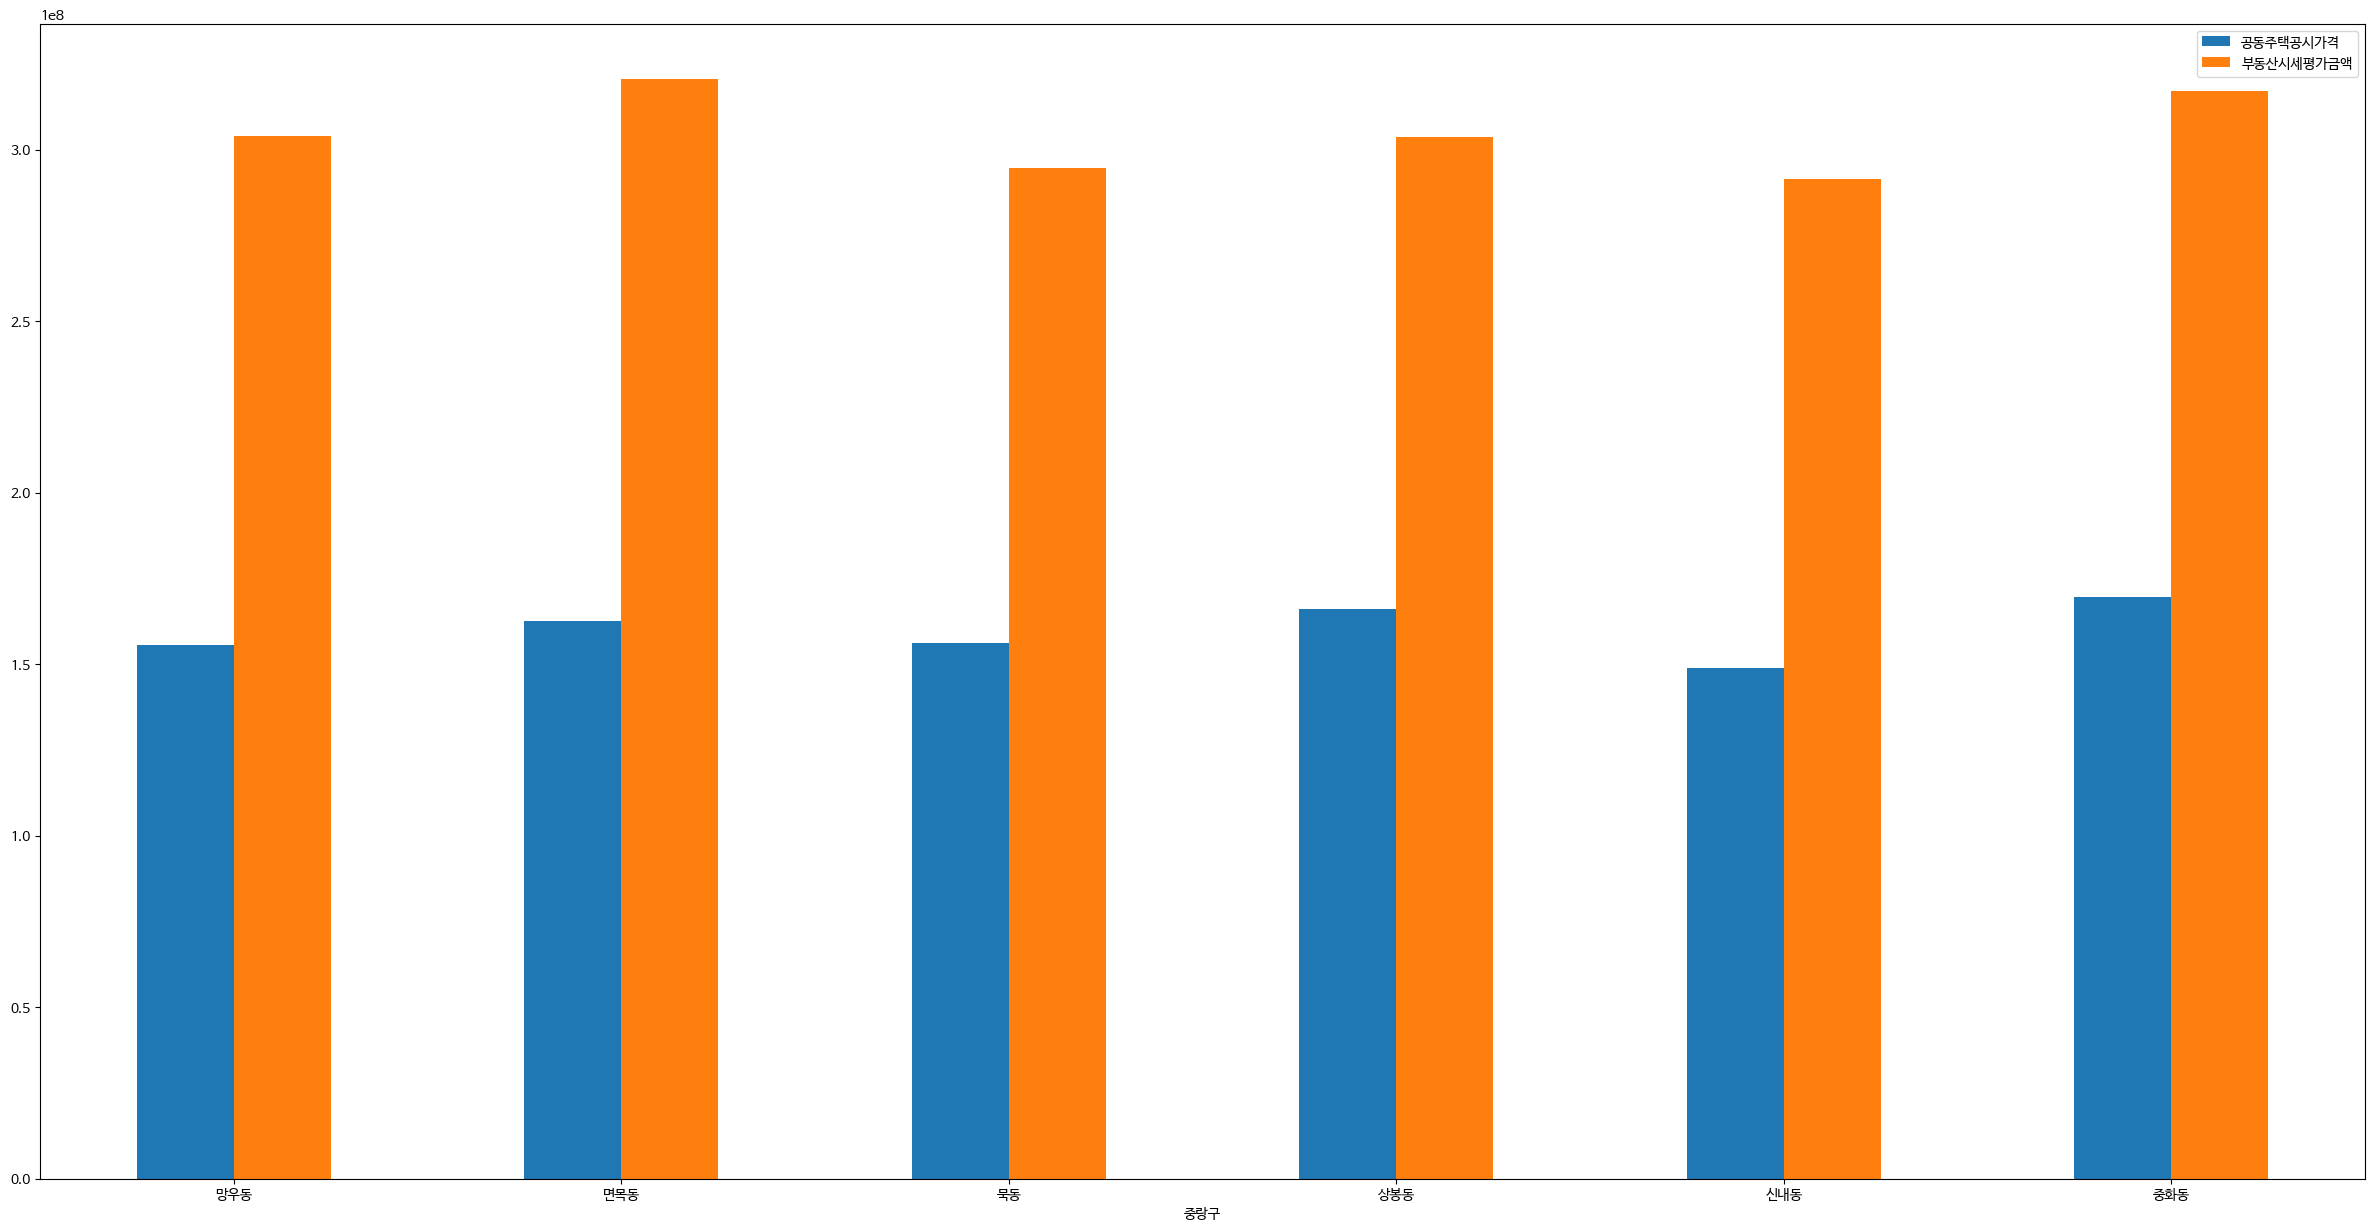

In [ ]:
propm3 = pm12.groupby('Dong').mean()
propm3.plot(y=['APHUS_POTVALE','ESTT_CURPRC_SMNT_AMT'],label=['공동주택공시가격','부동산시세평가금액'],
            kind='bar', rot=0 , figsize=(30,15), xlabel = '동작구')

## 2. Property (1Q~3Q)
#####(서울(연립,다세대,오피스텔))- 시세와 면적(1Q~3Q)

In [ ]:
prop1 = pd.read_csv("/content/drive/MyDrive/Property")
prop1.drop(['Unnamed: 0'],axis=1, inplace = True) # 'Unnamed: 0' 열 제거해야함.
prop2 = prop1.drop(range(0,63),axis=0)
prop2.shape

(1914221, 10)

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
prop2.columns

Index(['SIGNLE', 'CTPR_NM', 'SIGNGU_NM', 'Dong', 'Bun', 'ESTT_CURPRC_SMNT_AMT',
       'XU_DIMS', 'LTOUT_DIMS', 'LA', 'LO'],
      dtype='object')

<ipython-input-8-970f2c86d88e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prop3 = prop2.groupby('SIGNGU_NM').mean()


<Axes: xlabel='서울 자치구'>

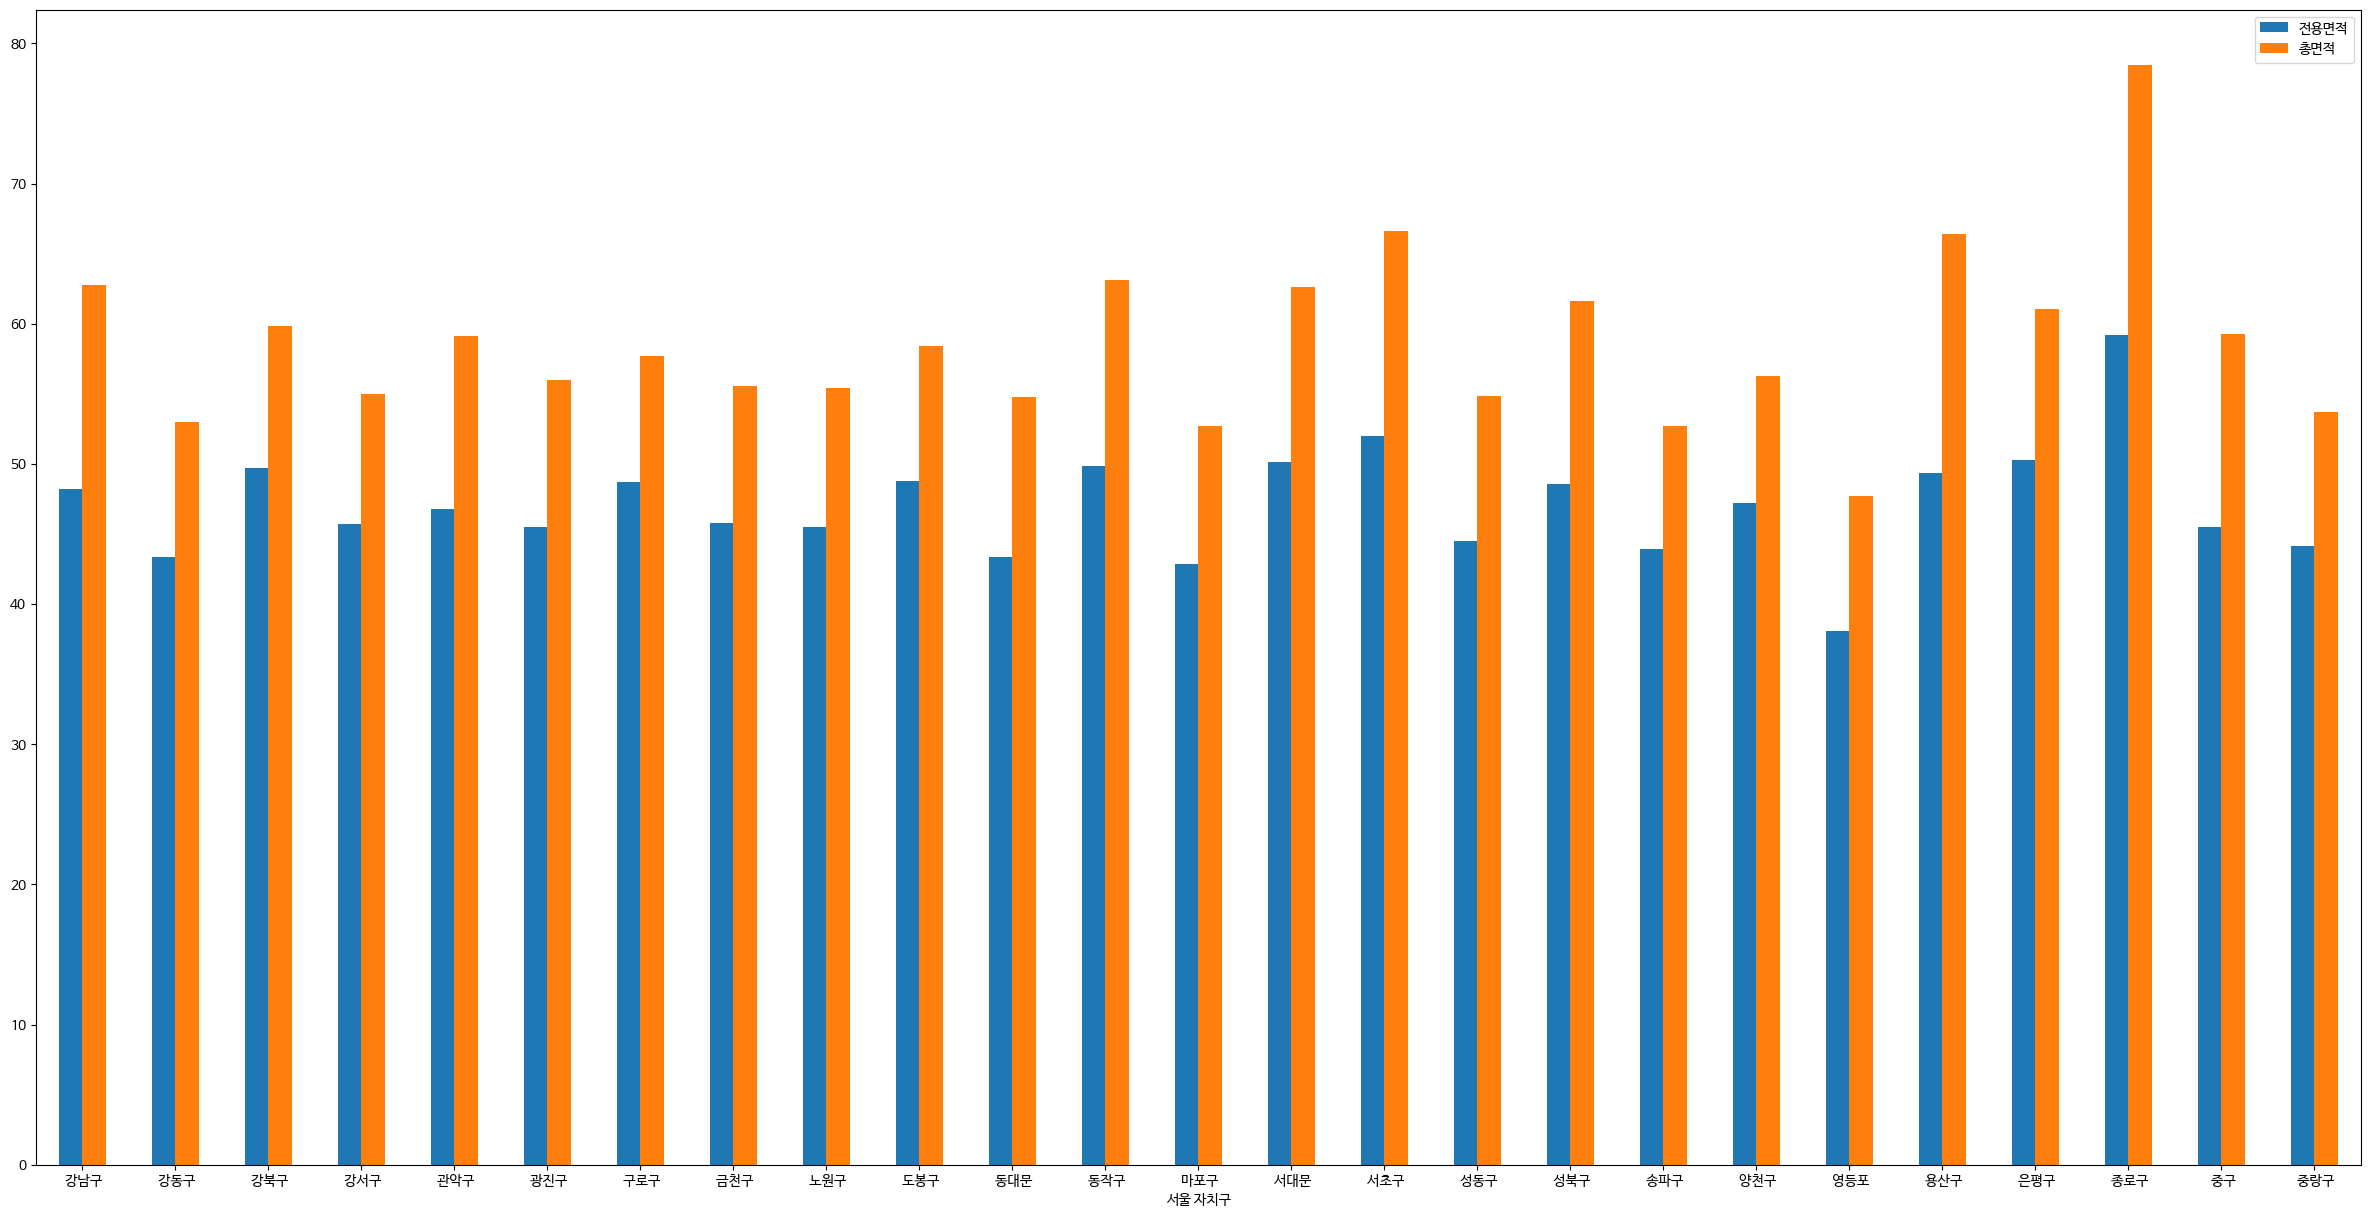

In [ ]:
prop3 = prop2.groupby('SIGNGU_NM').mean()
prop3.plot(y=['XU_DIMS','LTOUT_DIMS'], label=['전용면적', '총면적'],kind='bar', rot=0 , figsize=(30,15), xlabel = '서울 자치구')

In [ ]:
p1[p1['Dong']=='자곡동'].head()

,SIGNLE,CTPR_NM,SIGNGU_NM,Dong,Bun,ESTT_CURPRC_SMNT_AMT,XU_DIMS,LTOUT_DIMS,LA,LO
79612,11680 11200,서울특별시,강남구,자곡동,440-27번지,0.00000,196.16000,224.42000,37.47349,127.09879
79613,11680 11200,서울특별시,강남구,자곡동,440-27번지,0.00000,257.94000,295.09000,37.47349,127.09879
79614,11680 11200,서울특별시,강남구,자곡동,440-27번지,0.00000,196.16000,224.42000,37.47349,127.09879
79615,11680 11200,서울특별시,강남구,자곡동,440-27번지,0.00000,257.94000,295.09000,37.47349,127.09879
79616,11680 11200,서울특별시,강남구,자곡동,440-27번지,0.00000,196.16000,224.42000,37.47349,127.09879


In [ ]:
p1 = prop2[prop2['SIGNGU_NM']==' 강남구']
p2 = prop2[prop2['SIGNGU_NM']==' 강동구']
p3 = prop2[prop2['SIGNGU_NM']==' 강북구']
p4 = prop2[prop2['SIGNGU_NM']==' 강서구']
p5 = prop2[prop2['SIGNGU_NM']==' 관악구']
p6 = prop2[prop2['SIGNGU_NM']==' 광진구']
p7 = prop2[prop2['SIGNGU_NM']==' 구로구']
p8 = prop2[prop2['SIGNGU_NM']==' 금천구']
p9 = prop2[prop2['SIGNGU_NM']==' 노원구']
p10 = prop2[prop2['SIGNGU_NM']==' 도봉구']
p11 = prop2[prop2['SIGNGU_NM']==' 동대문']
p12 = prop2[prop2['SIGNGU_NM']==' 동작구']
p13 = prop2[prop2['SIGNGU_NM']==' 마포구']
p14 = prop2[prop2['SIGNGU_NM']==' 서대문']
p15 = prop2[prop2['SIGNGU_NM']==' 서초구']
p16 = prop2[prop2['SIGNGU_NM']==' 성동구']
p17 = prop2[prop2['SIGNGU_NM']==' 성북구']
p18 = prop2[prop2['SIGNGU_NM']==' 송파구']
p19 = prop2[prop2['SIGNGU_NM']==' 양천구']
p20 = prop2[prop2['SIGNGU_NM']==' 영등포']
p21 = prop2[prop2['SIGNGU_NM']==' 용산구']
p22 = prop2[prop2['SIGNGU_NM']==' 은평구']
p23 = prop2[prop2['SIGNGU_NM']==' 종로구']
p24 = prop2[prop2['SIGNGU_NM']==' 중구']
p25 = prop2[prop2['SIGNGU_NM']==' 중랑구']

<ipython-input-68-fba30e506c2d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prop4 = p25.groupby('Dong').mean()


<Axes: xlabel='중랑구'>

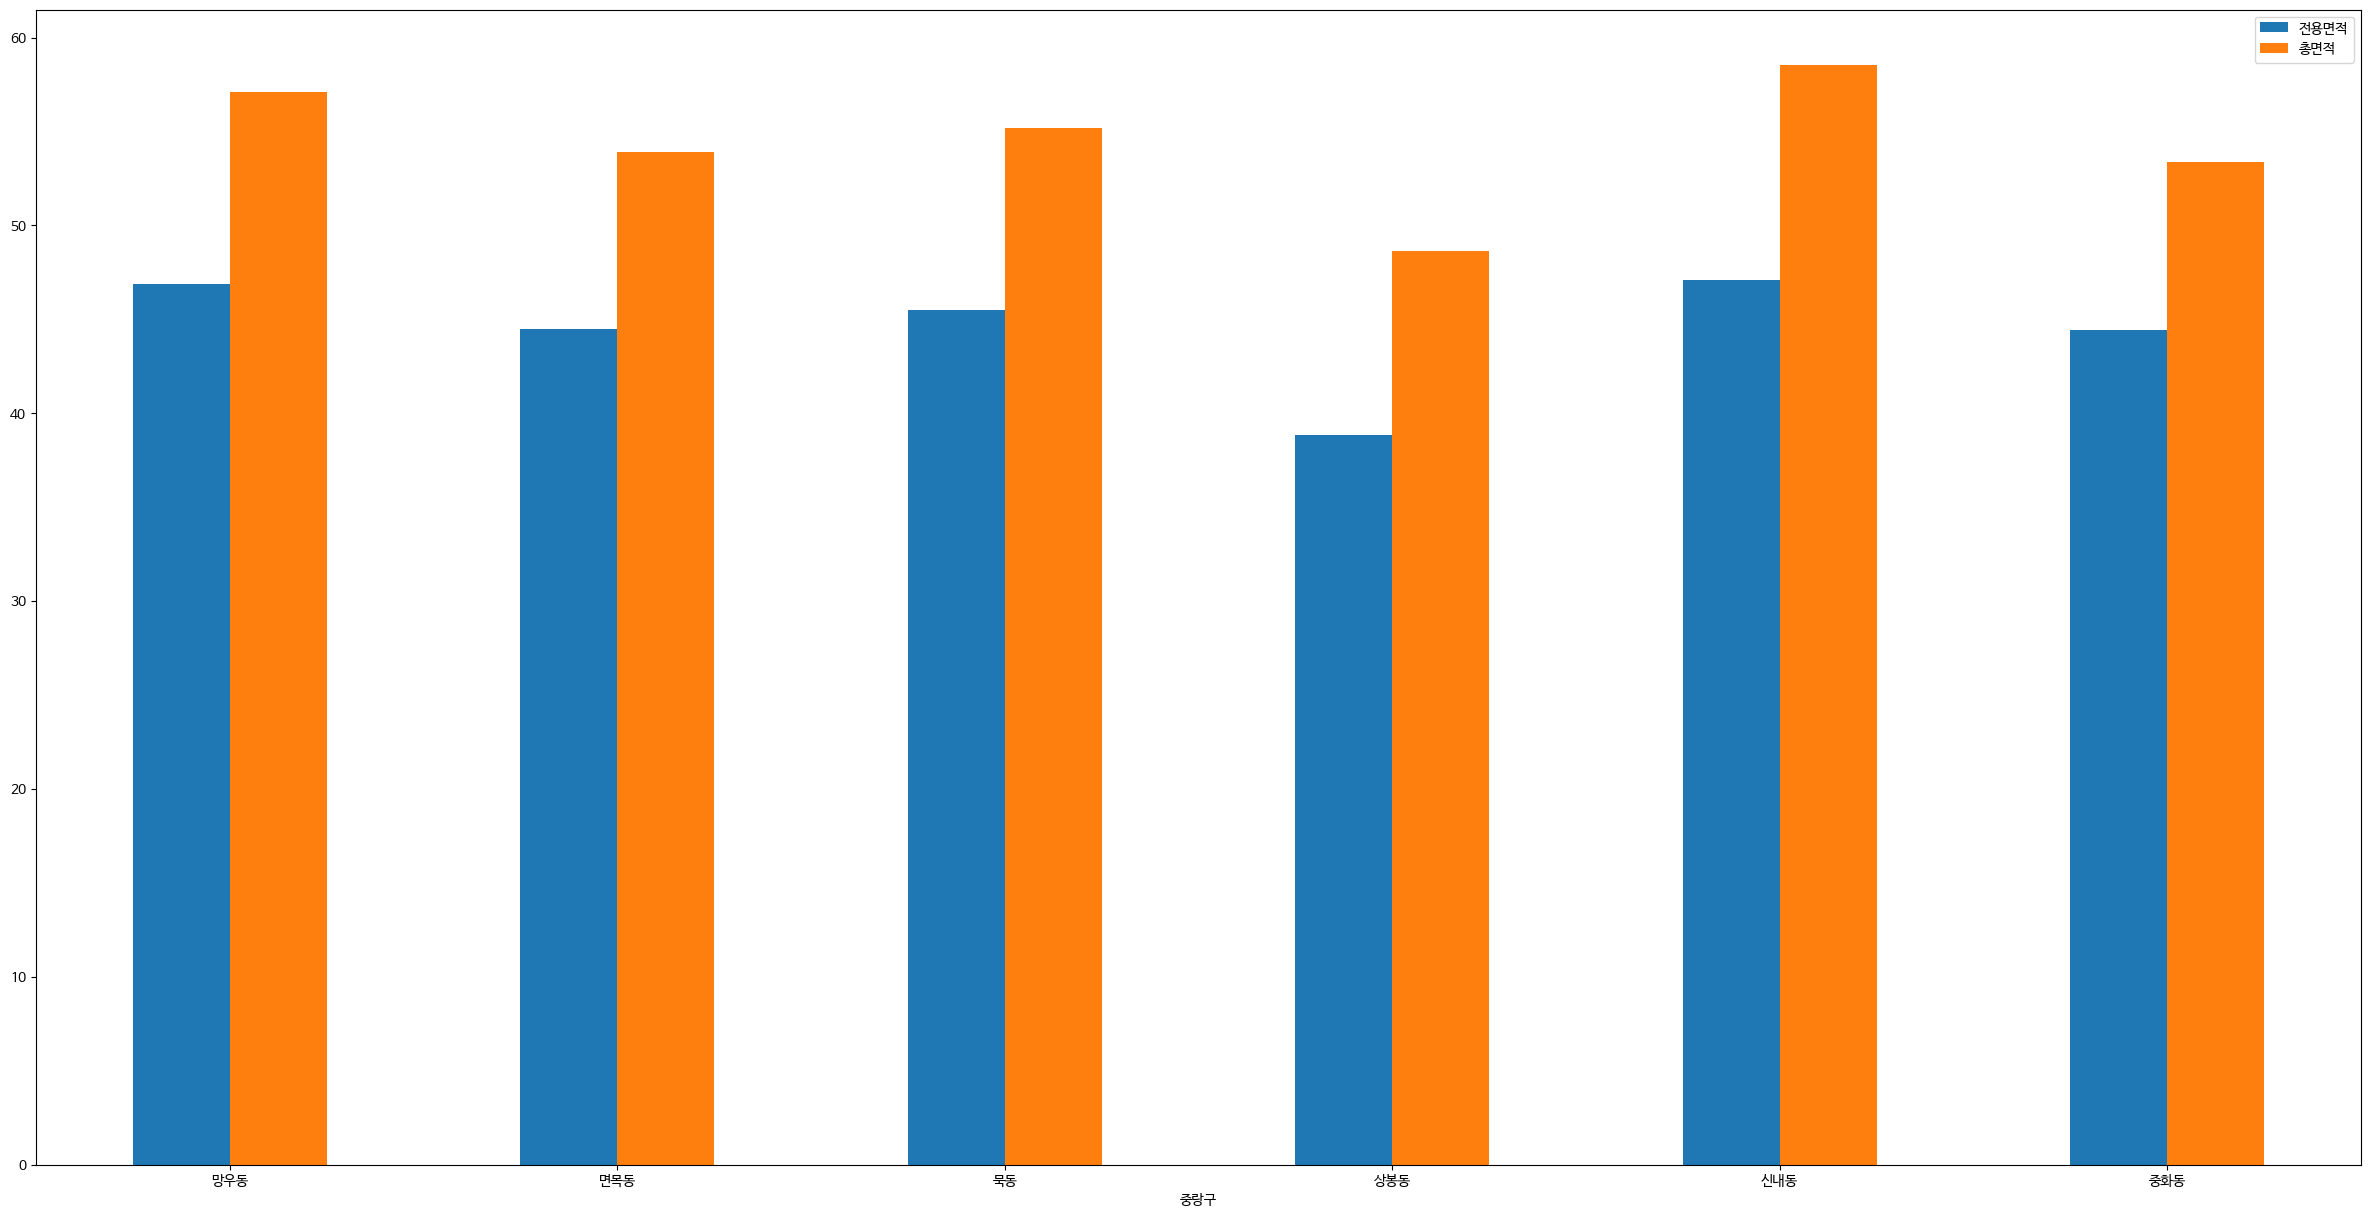

In [ ]:
prop4 = p25.groupby('Dong').mean()
prop4.plot(y=['XU_DIMS','LTOUT_DIMS'], label=['전용면적', '총면적'],kind='bar', rot=0 , figsize=(30,15), xlabel = '중랑구')

## 3. Energy (23.01 ~ 23.06)

In [ ]:
E1 = pd.read_csv("/content/drive/MyDrive/Energy")
E1.drop(['Unnamed: 0'],axis=1, inplace = True)

In [ ]:
E1.shape

(1524, 24)

<ipython-input-71-cf996f125f22>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E2= E1.groupby('SIGNGU_NM').mean()


<Axes: xlabel='서울 자치구'>

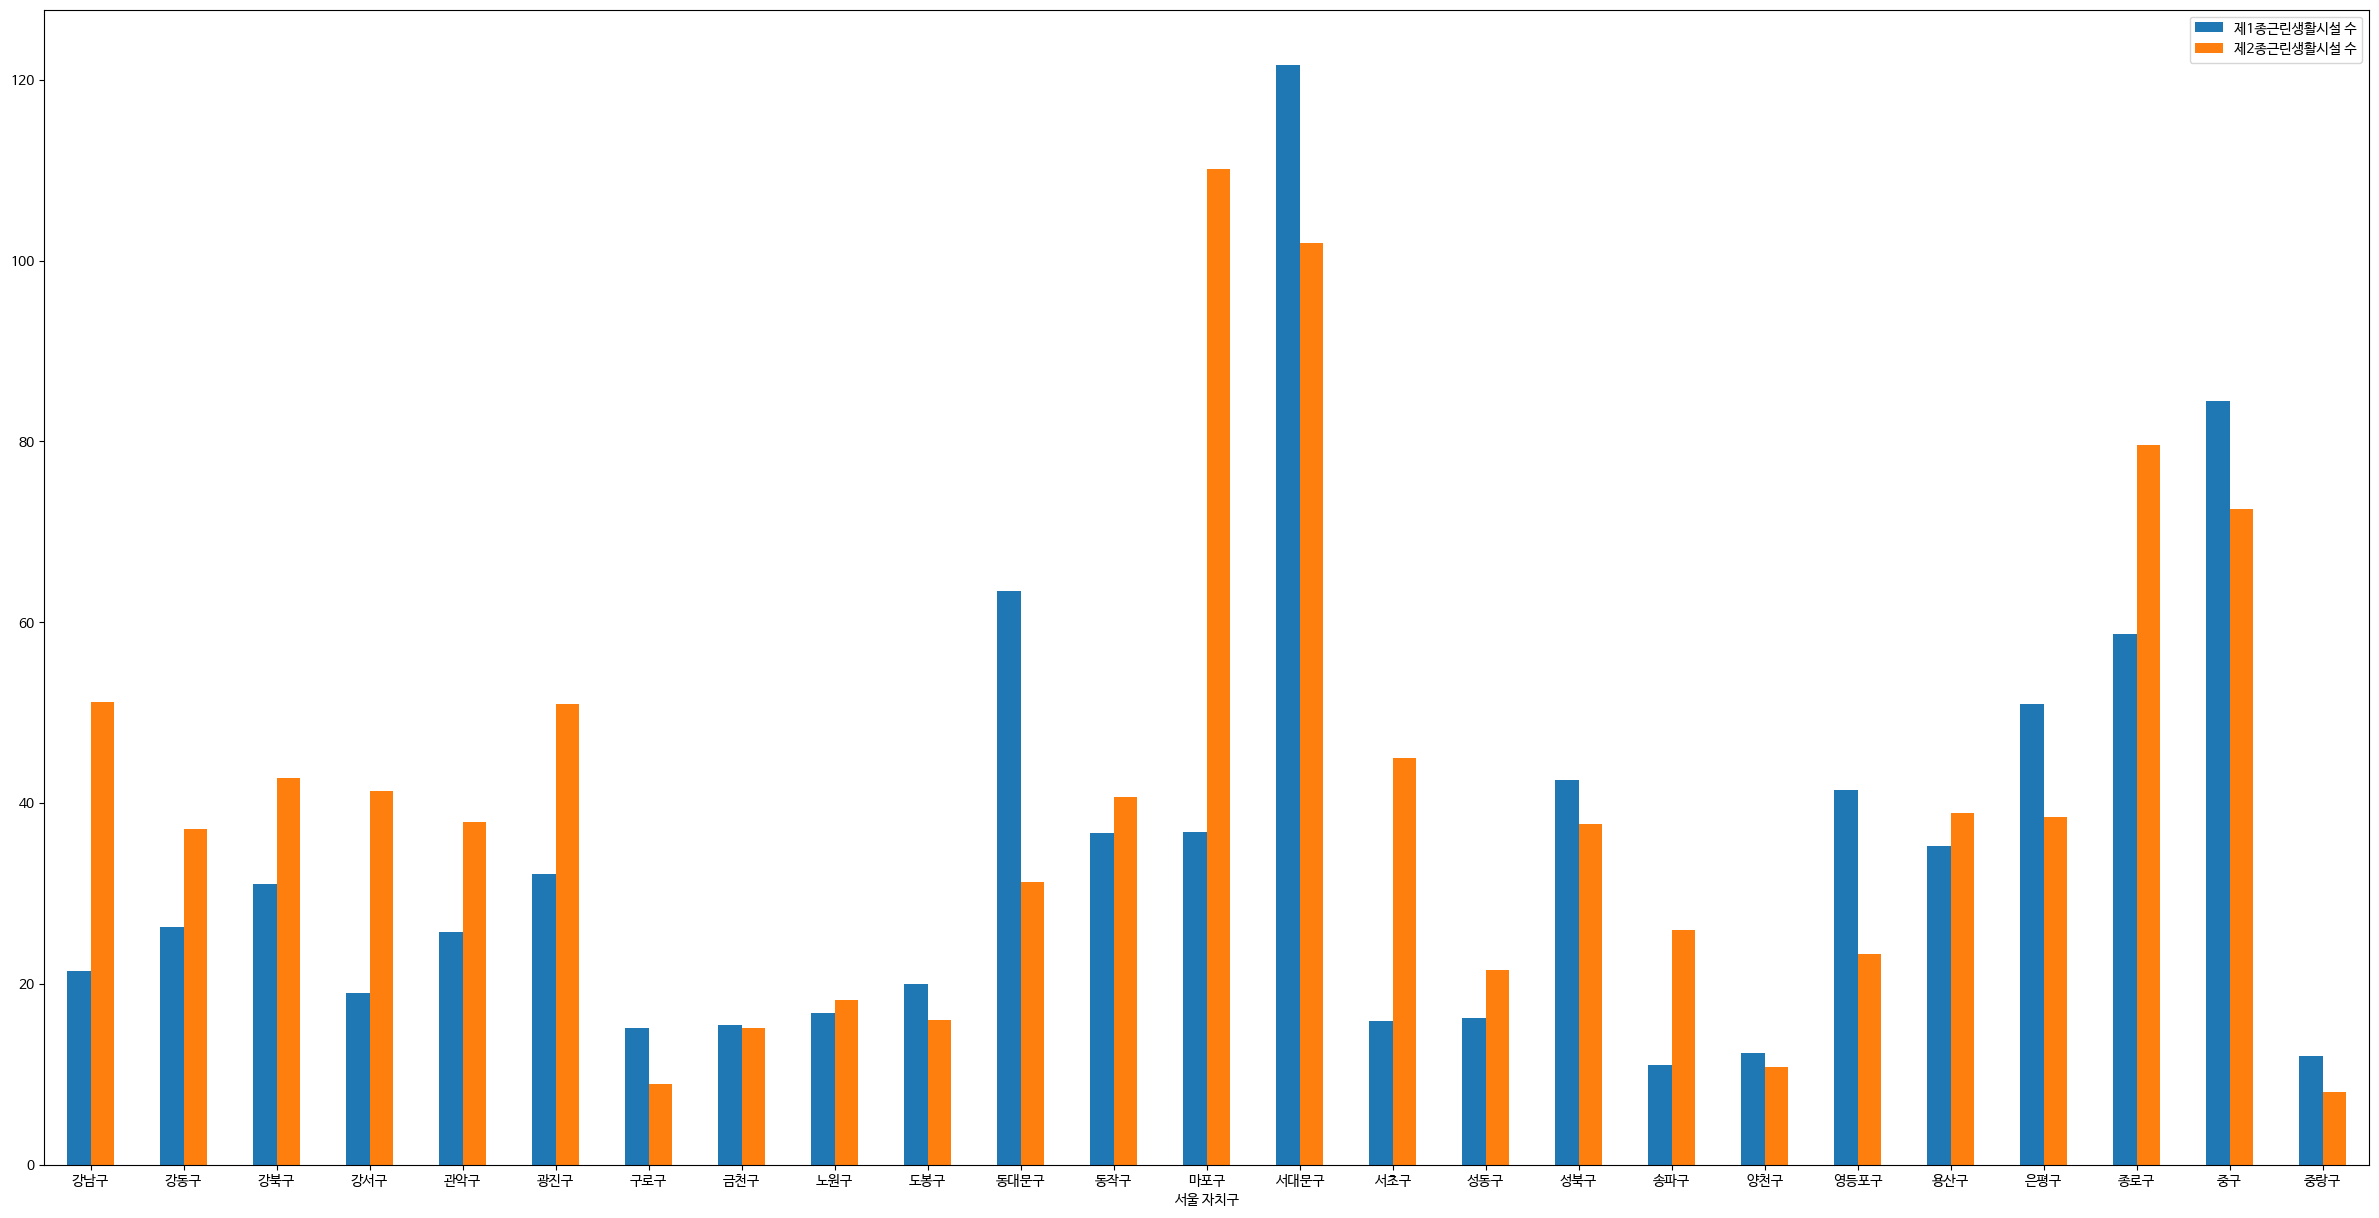

In [ ]:
E2= E1.groupby('SIGNGU_NM').mean()
E2.plot(y=['TRDAR_ISE_1KIND_NGHBRHD_LVLH_FCLTY_CNT','TRDAR_ISE_2KIND_NGHBRHD_LVLH_FCLTY_CNT'],label=['제1종근린생활시설 수','제2종근린생활시설 수'],
        kind='bar', rot=0 , figsize=(30,15), xlabel = '서울 자치구')

In [ ]:
E1[E1['SIGNGU_NM']=='중랑구'].head()

,TRDAR_NO,TRDAR_NM,CTPR_CD,CTPR_NM,SIGNGU_CD,SIGNGU_NM,TRDAR_ISE_TOTL_BILD_CNT,TRDAR_ISE_1KIND_NGHBRHD_LVLH_FCLTY_CNT,TRDAR_ISE_2KIND_NGHBRHD_LVLH_FCLTY_CNT,TRDAR_ISE_CLTUR_AND_MTNG_FCLTY_CNT,...,TRDAR_ISE_NVTT_FCLTY_CNT,TRDAR_ISE_EXRCS_FCLTY_CNT,TRDAR_ISE_ACMT_CNT,TRDAR_ISE_WAF_FCLTY_CNT,TRDAR_ISE_GAS_TOTL_USQNT,TRDAR_ISE_FTRM_TOTL_USQNT,CMRC_PUP_BULD_GAS_USQNT,CMRC_PUP_BULD_FTRM_USQNT,TRDAR_CRDNT_CONT,DATA_STRD_YM
1518,9266,사가정역,11,서울특별시,11260,중랑구,26,12,8,0,...,0,0,0,0,67518,195381,67518,194812,MULTIPOLYGON (((127.08853475873 37.58141620417...,202301
1519,9266,사가정역,11,서울특별시,11260,중랑구,26,12,8,0,...,0,0,0,0,67518,195381,67518,194812,MULTIPOLYGON (((127.08853475873 37.58141620417...,202301
1520,9266,사가정역,11,서울특별시,11260,중랑구,26,12,8,0,...,0,0,0,0,67518,195381,67518,194812,MULTIPOLYGON (((127.08853475873 37.58141620417...,202301
1521,9266,사가정역,11,서울특별시,11260,중랑구,26,12,8,0,...,0,0,0,0,67518,195381,67518,194812,MULTIPOLYGON (((127.08853475873 37.58141620417...,202301
1522,9266,사가정역,11,서울특별시,11260,중랑구,26,12,8,0,...,0,0,0,0,67518,195381,67518,194812,MULTIPOLYGON (((127.08853475873 37.58141620417...,202301


<Axes: xlabel='서울 시에 속한 구'>

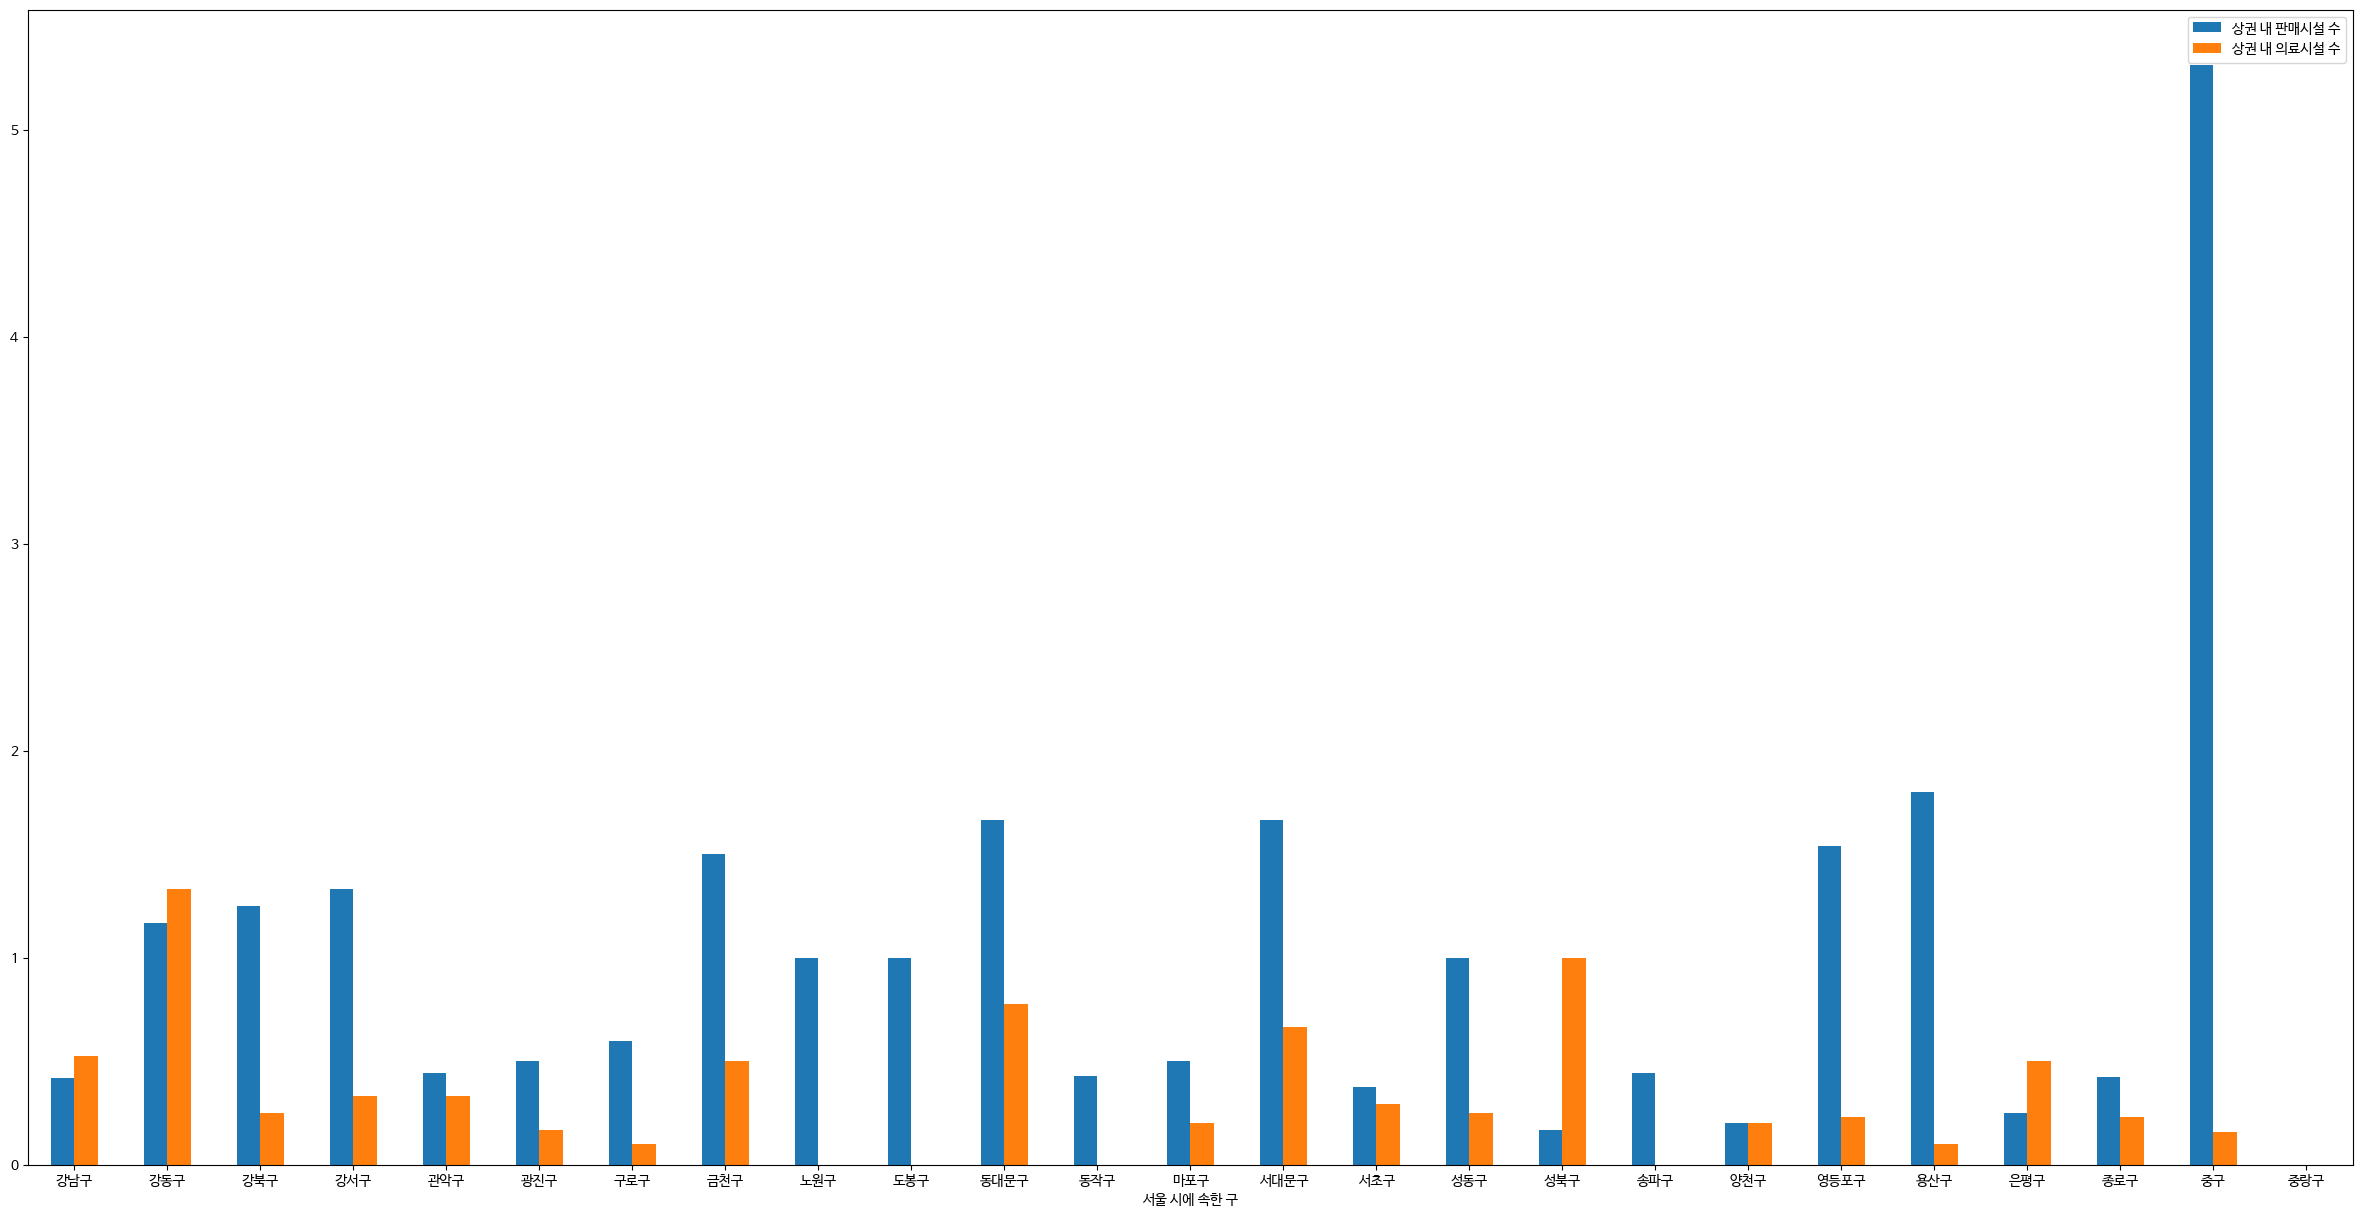

In [ ]:
E2.plot(y=['TRDAR_ISE_NTSL_FCLTY_CNT', 'TRDAR_ISE_MLFLT_CNT'], label = ['상권 내 판매시설 수','상권 내 의료시설 수'],
        kind='bar', rot=0 , figsize=(30,15), xlabel = '서울 시에 속한 구')

In [ ]:
e1 = E1[E1['SIGNGU_NM']=='강남구']
e2 = E1[E1['SIGNGU_NM']=='강동구']
e3 = E1[E1['SIGNGU_NM']=='강북구']
e4 = E1[E1['SIGNGU_NM']=='강서구']
e5 = E1[E1['SIGNGU_NM']=='관악구']
e6 = E1[E1['SIGNGU_NM']=='광진구']
e7 = E1[E1['SIGNGU_NM']=='구로구']
e8 = E1[E1['SIGNGU_NM']=='금천구']
e9 = E1[E1['SIGNGU_NM']=='노원구']
e10 = E1[E1['SIGNGU_NM']=='도봉구']
e11 = E1[E1['SIGNGU_NM']=='동대문구']
e12 = E1[E1['SIGNGU_NM']=='동작구']
e13 = E1[E1['SIGNGU_NM']=='마포구']
e14 = E1[E1['SIGNGU_NM']=='서대문구']
e15 = E1[E1['SIGNGU_NM']=='서초구']
e16 = E1[E1['SIGNGU_NM']=='성동구']
e17 = E1[E1['SIGNGU_NM']=='성북구']
e18 = E1[E1['SIGNGU_NM']=='송파구']
e19 = E1[E1['SIGNGU_NM']=='양천구']
e20 = E1[E1['SIGNGU_NM']=='영등포']
e21 = E1[E1['SIGNGU_NM']=='용산구']
e22 = E1[E1['SIGNGU_NM']=='은평구']
e23 = E1[E1['SIGNGU_NM']=='종로구']
e24 = E1[E1['SIGNGU_NM']=='중구']
e25 = E1[E1['SIGNGU_NM']=='중랑구']

In [ ]:
e1.head()

<ipython-input-89-0704bf09349d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  E3 = e1.groupby('TRDAR_NM').mean()


<Axes: xlabel='강남구'>

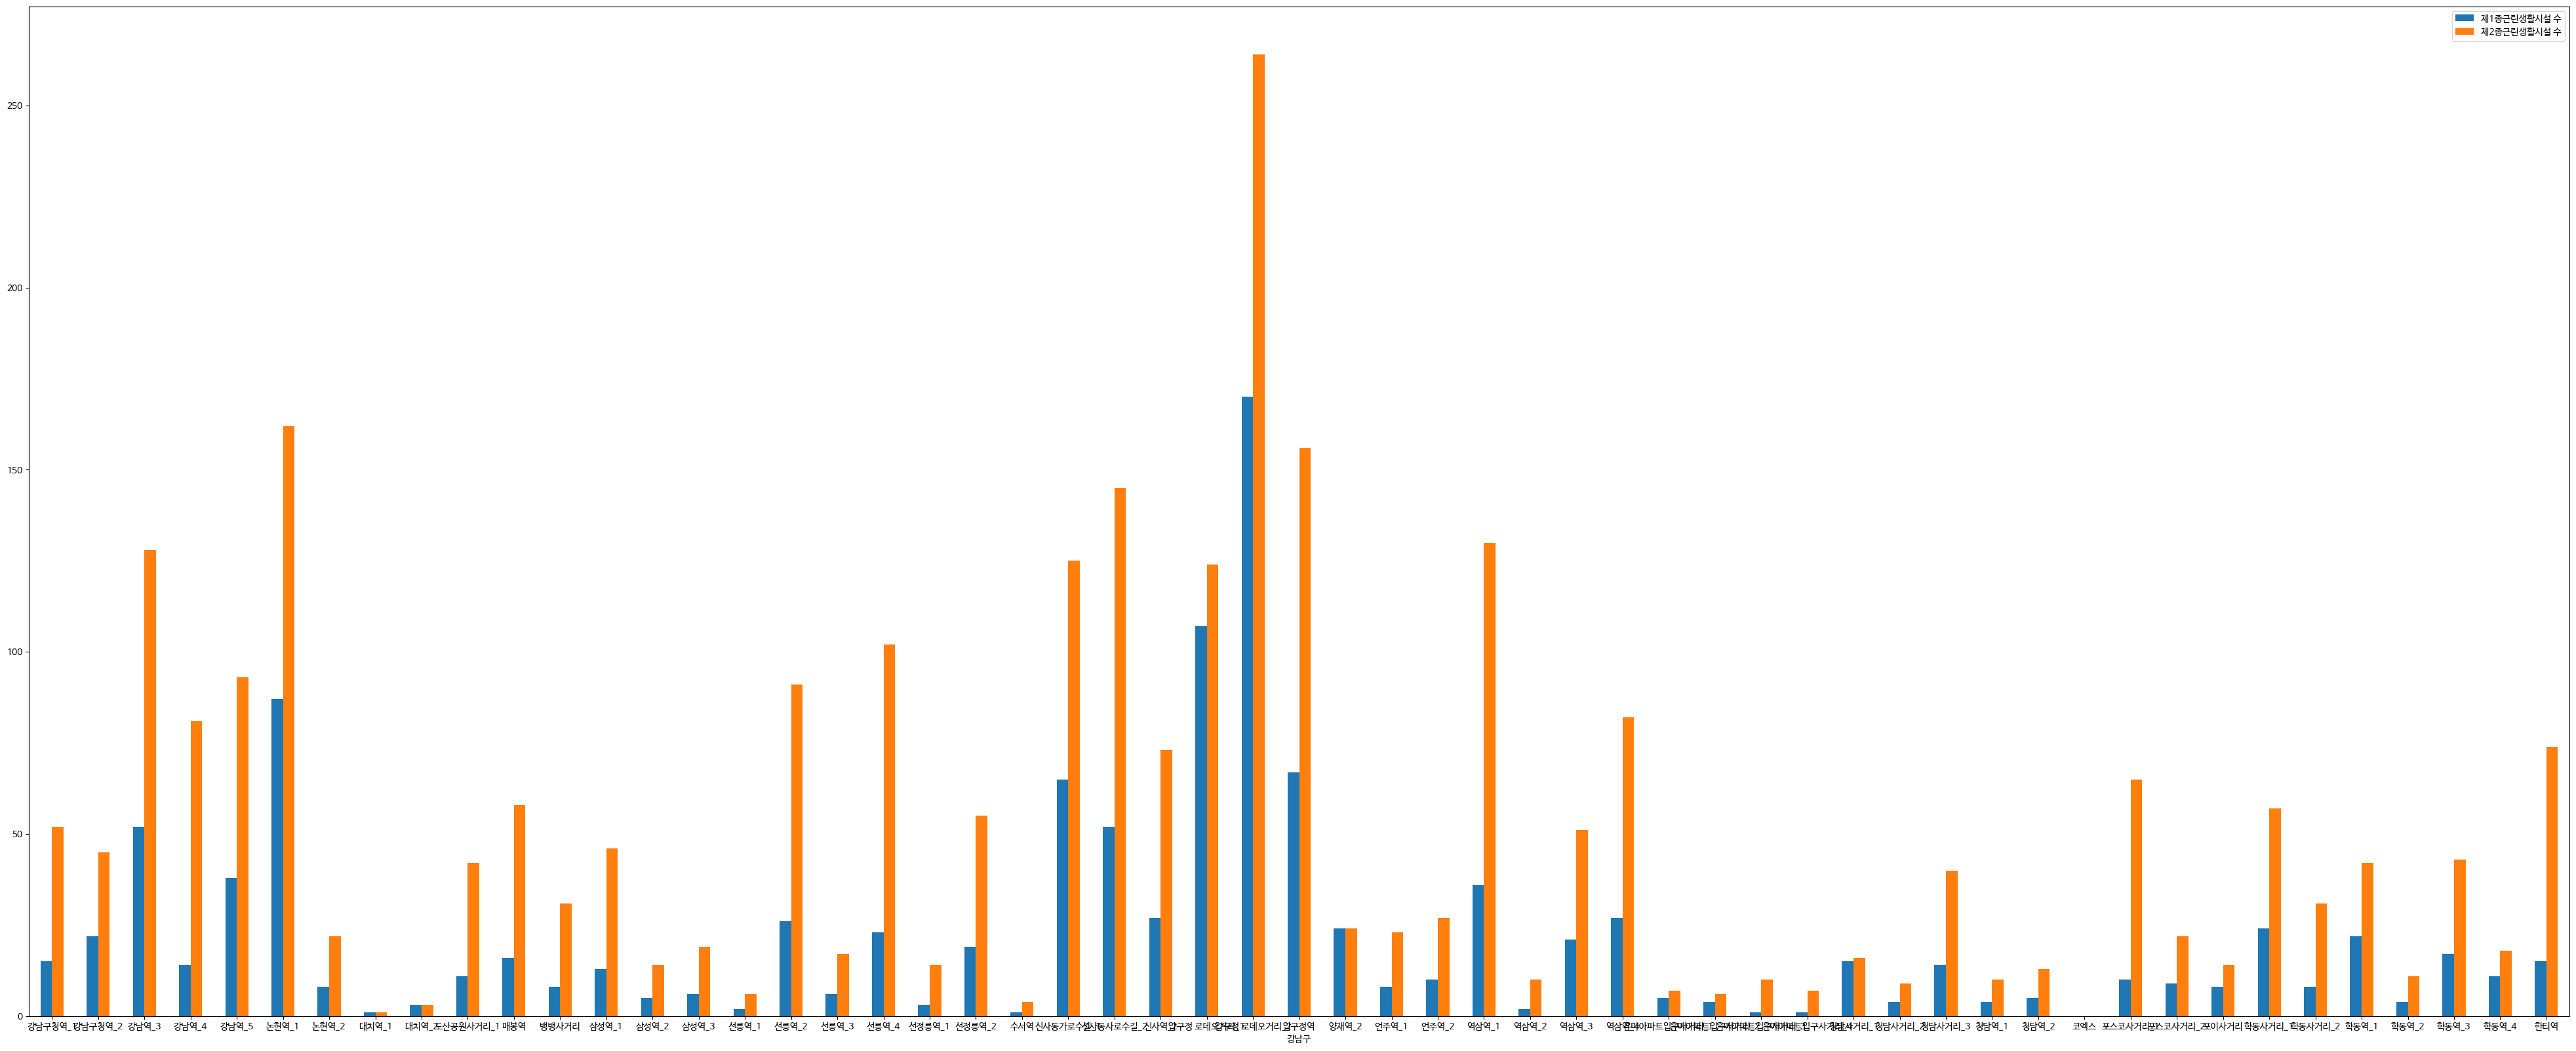

In [ ]:
E3 = e1.groupby('TRDAR_NM').mean()
E3.plot(y=['TRDAR_ISE_1KIND_NGHBRHD_LVLH_FCLTY_CNT','TRDAR_ISE_2KIND_NGHBRHD_LVLH_FCLTY_CNT'],label=['제1종근린생활시설 수','제2종근린생활시설 수'],
        kind='bar', rot=0 , figsize=(50,20), xlabel = '강남구')

<Axes: xlabel='강남구'>

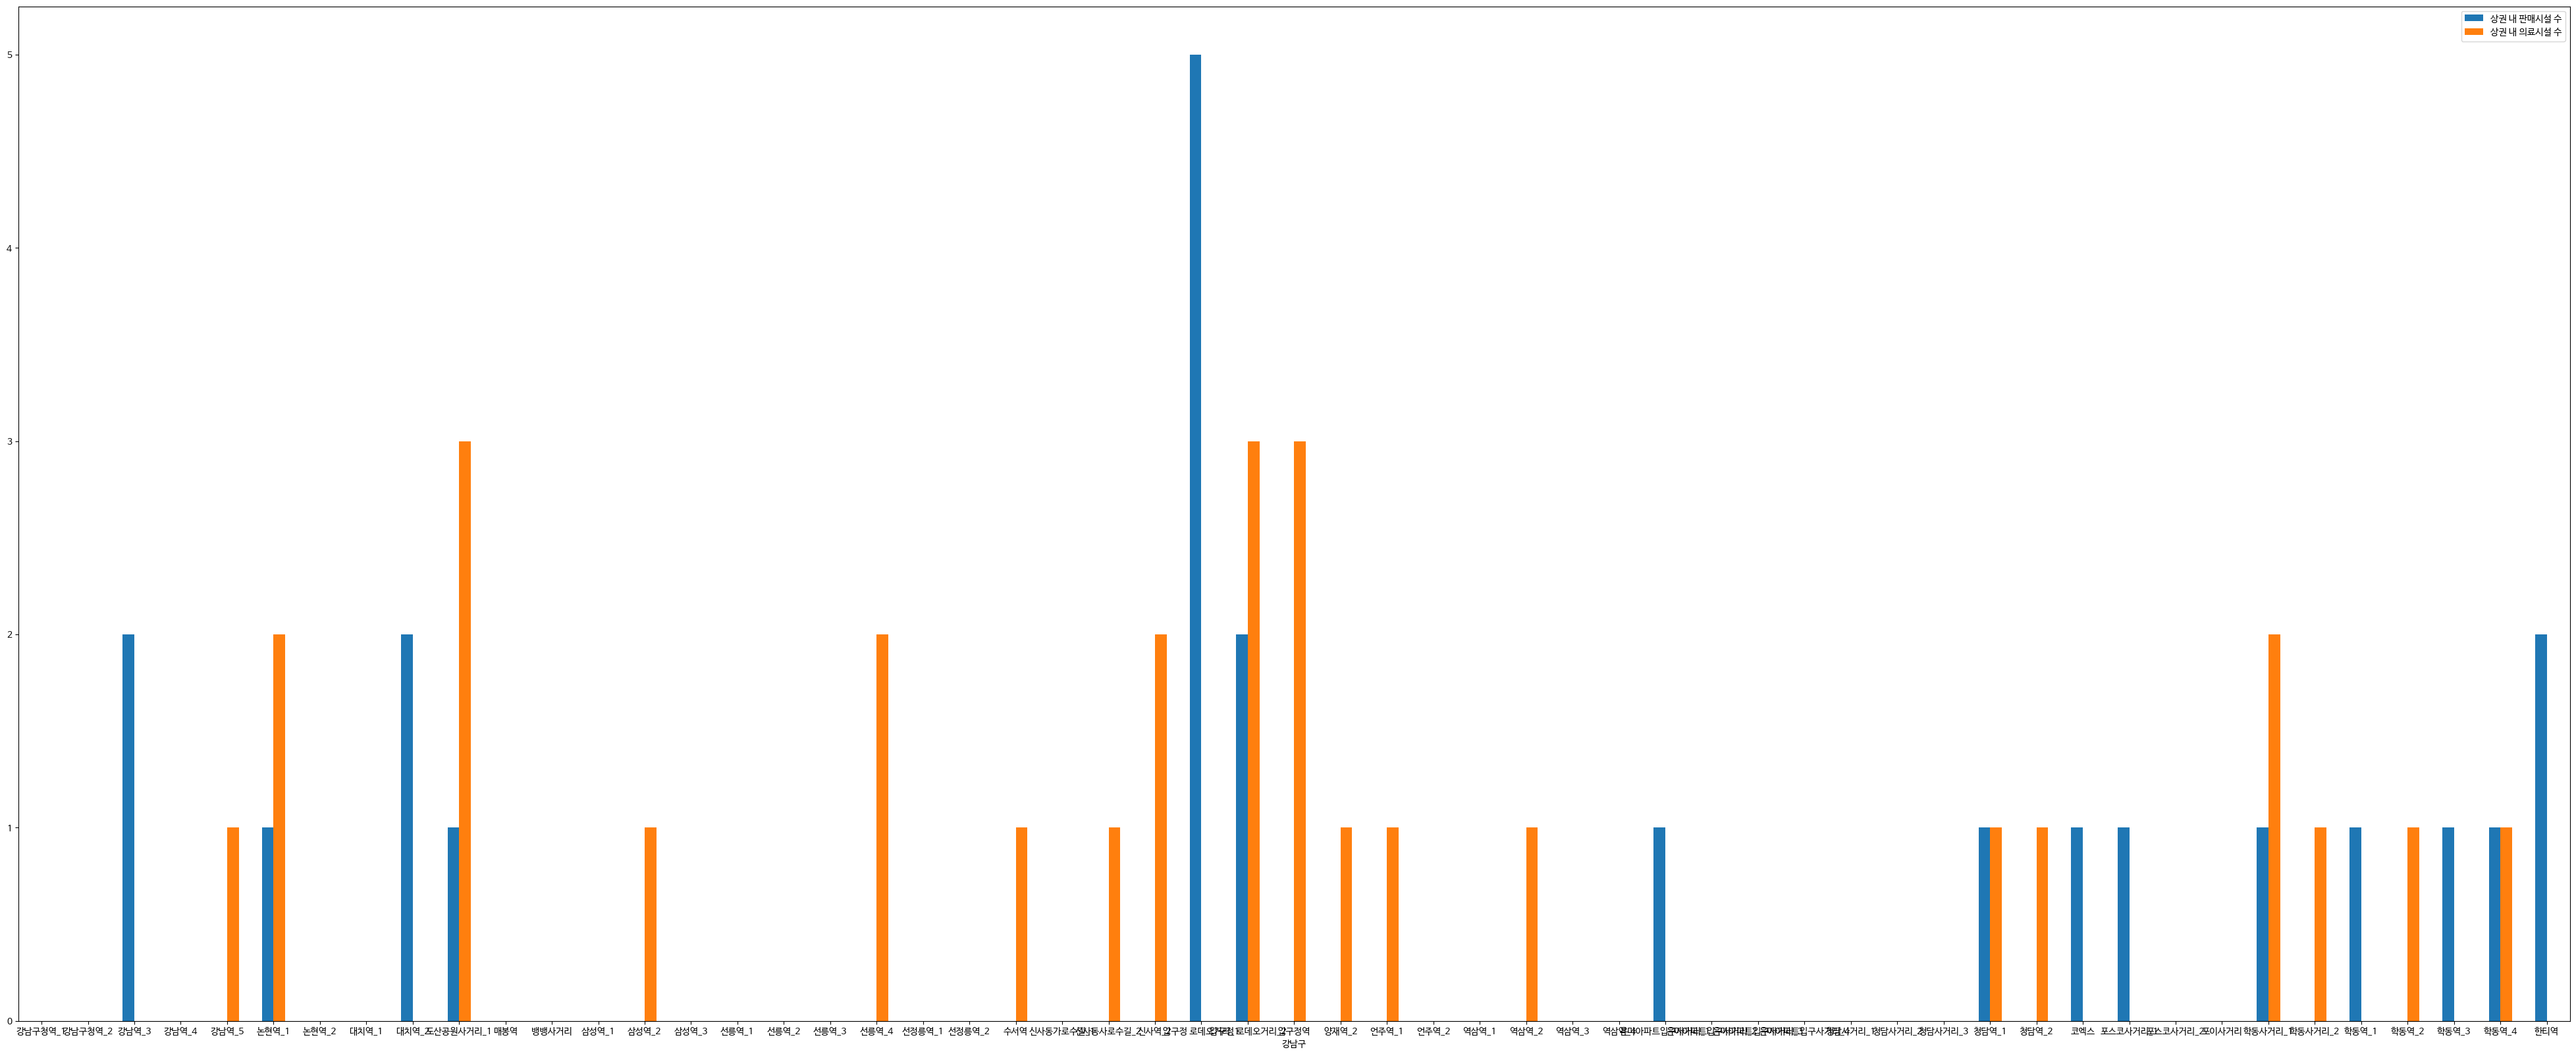

In [ ]:
E3.plot(y=['TRDAR_ISE_NTSL_FCLTY_CNT', 'TRDAR_ISE_MLFLT_CNT'], label = ['상권 내 판매시설 수','상권 내 의료시설 수'],
        kind='bar', rot=0 , figsize=(50,20), xlabel = '강남구')

## 4. 서울시 부동산 전월세 정보 [서울 열린데이터 광장]
#### seoul.csv파일
##### SeoulJ _ 서울 전세
##### SeoulW _ 서울 월세

###### 파이썬에서 건물용도 아파트 제거 필요

In [ ]:
SJ1 = pd.read_csv("/content/drive/MyDrive/SeoulJ")
SJ1.drop(['Unnamed: 0'],axis=1, inplace = True) # 'Unnamed: 0' 열 제거해야함.
SJ1.head()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
0,2023,서초구,서초동,15500,0,단독다가구,전세
1,2023,광진구,자양동,17000,0,단독다가구,전세
2,2023,강동구,성내동,20000,0,단독다가구,전세
3,2023,송파구,석촌동,22000,0,연립다세대,전세
4,2023,관악구,신림동,7000,0,단독다가구,전세


In [ ]:
SJ1.head()

In [ ]:
SJ1.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
SJ2 = SJ1[SJ1['건물용도'] != '아파트']
SJ2.shape

(111255, 7)

In [ ]:
SJ3 = SJ2.sort_values(by=['자치구명','법정동명'])
SJ3.head()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
99,2023,강남구,개포동,38000,0,연립다세대,전세
350,2023,강남구,개포동,20000,0,연립다세대,전세
523,2023,강남구,개포동,22000,0,단독다가구,전세
1237,2023,강남구,개포동,9680,0,단독다가구,전세
1511,2023,강남구,개포동,7000,0,연립다세대,전세


<ipython-input-9-8f724073f607>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SJ4 = SJ3.groupby('자치구명').mean()


<Axes: xlabel='서울 자치구'>

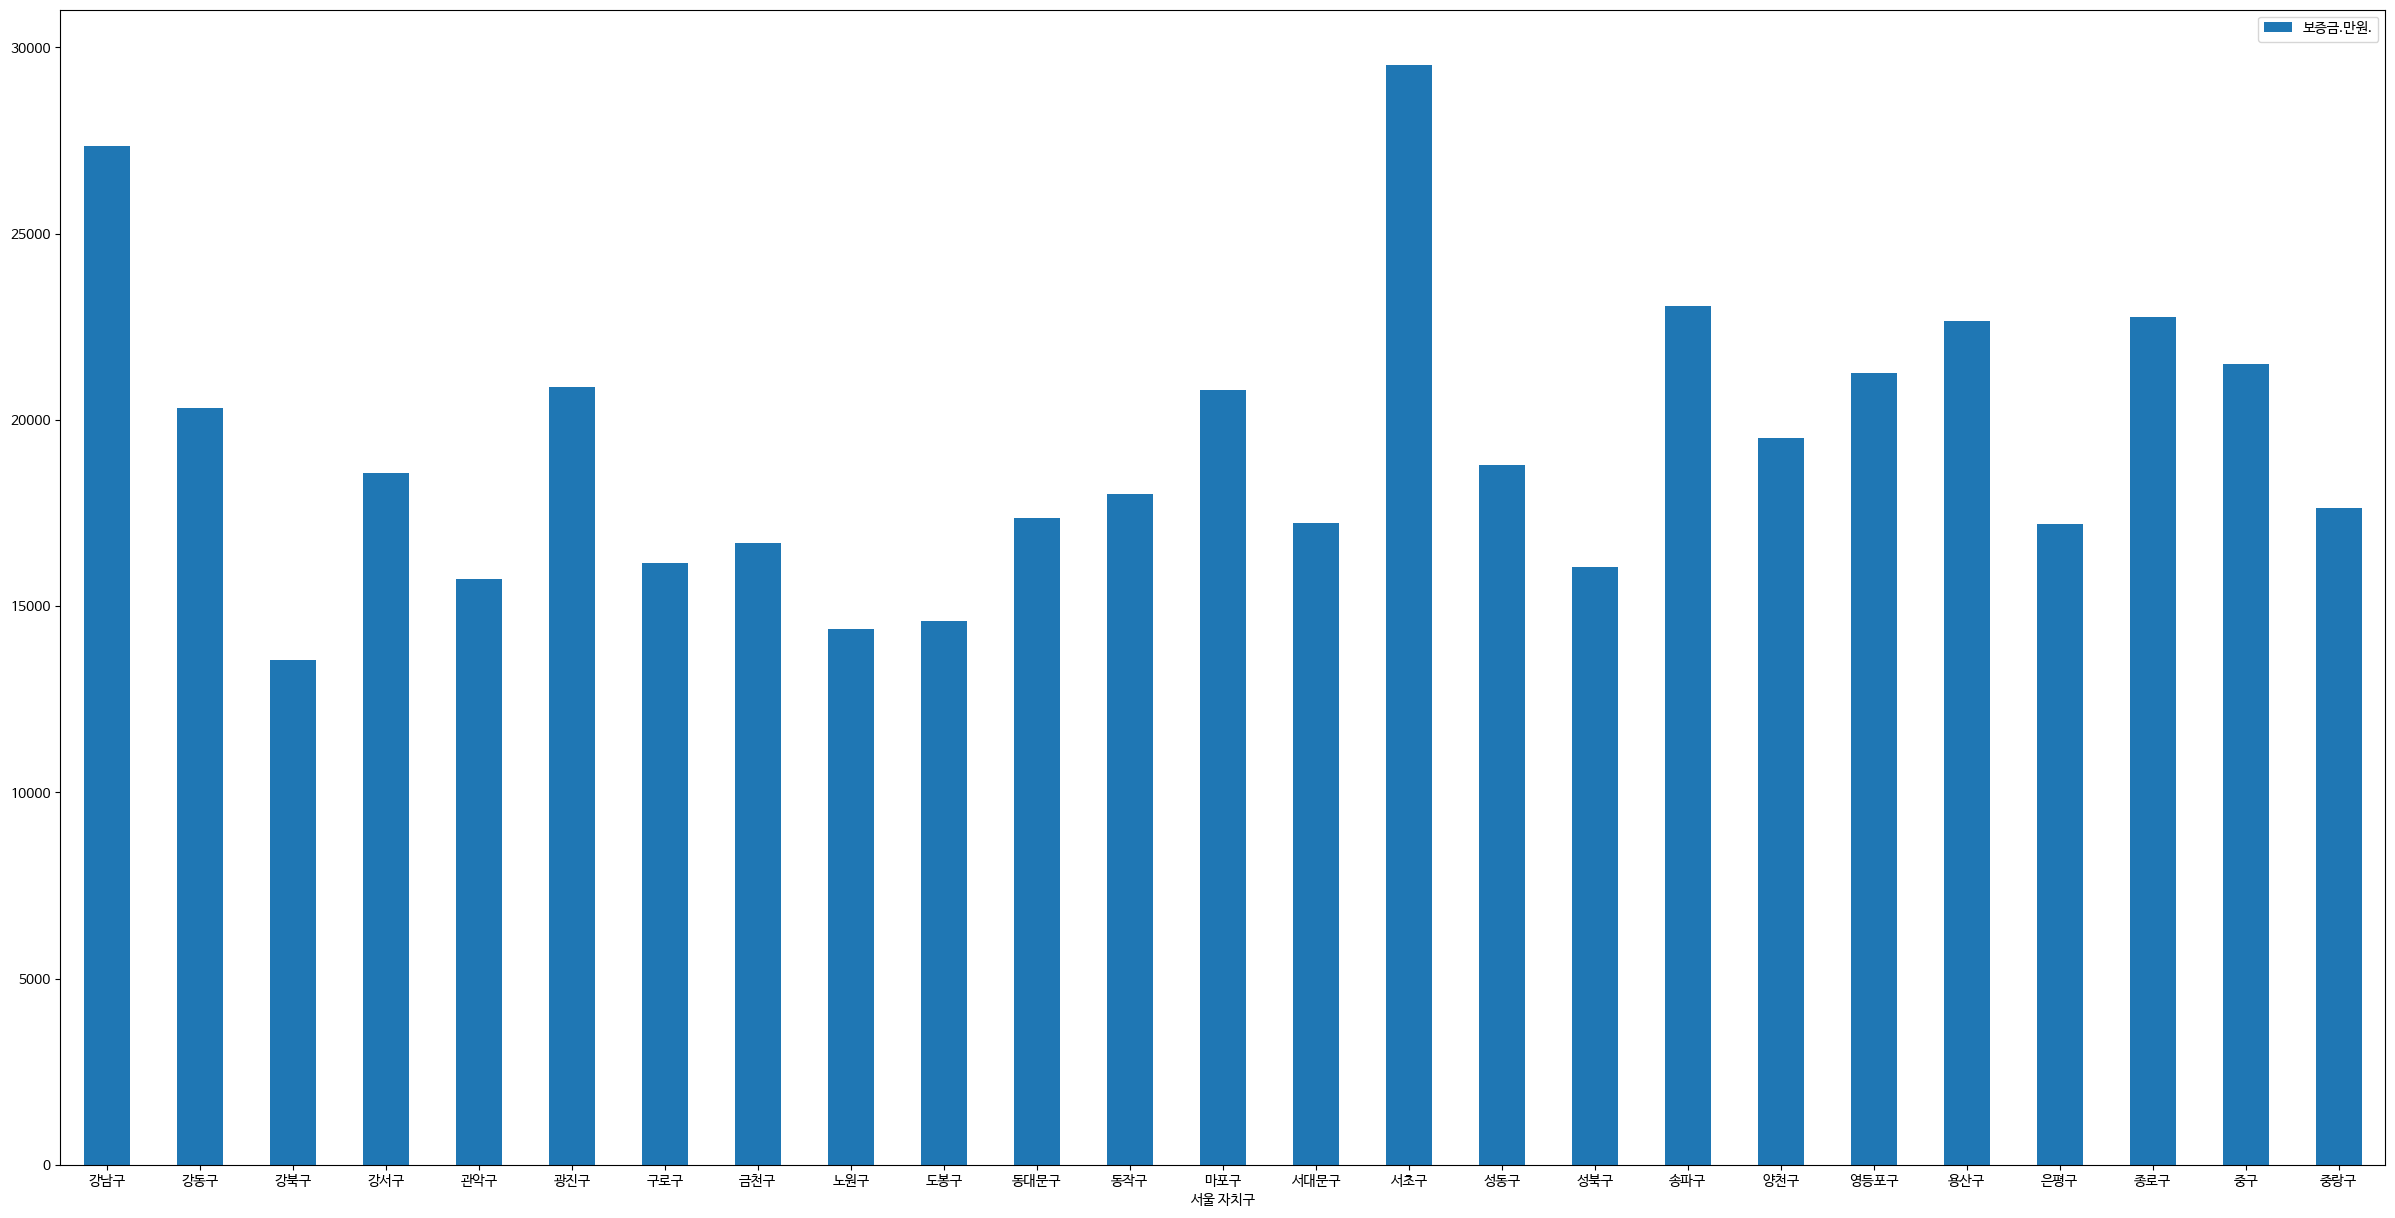

In [ ]:
SJ4 = SJ3.groupby('자치구명').mean()
SJ4.plot(y=['보증금.만원.'], label=['보증금.만원.'],kind='bar', rot=0 , figsize=(30,15),xlabel = '서울 자치구')

In [ ]:
sj1 = SJ3[SJ3['자치구명']=='강남구']
sj2 = SJ3[SJ3['자치구명']=='강동구']
sj3 = SJ3[SJ3['자치구명']=='강북구']
sj4 = SJ3[SJ3['자치구명']=='강서구']
sj5 = SJ3[SJ3['자치구명']=='관악구']
sj6 = SJ3[SJ3['자치구명']=='광진구']
sj7 = SJ3[SJ3['자치구명']=='구로구']
sj8 = SJ3[SJ3['자치구명']=='금천구']
sj9 = SJ3[SJ3['자치구명']=='노원구']
sj10 = SJ3[SJ3['자치구명']=='도봉구']
sj11 = SJ3[SJ3['자치구명']=='동대문구']
sj12 = SJ3[SJ3['자치구명']=='동작구']
sj13 = SJ3[SJ3['자치구명']=='마포구']
sj14 = SJ3[SJ3['자치구명']=='서대문구']
sj15 = SJ3[SJ3['자치구명']=='서초구']
sj16 = SJ3[SJ3['자치구명']=='성동구']
sj17 = SJ3[SJ3['자치구명']=='성북구']
sj18 = SJ3[SJ3['자치구명']=='송파구']
sj19 = SJ3[SJ3['자치구명']=='양천구']
sj20 = SJ3[SJ3['자치구명']=='영등포구']
sj21 = SJ3[SJ3['자치구명']=='용산구']
sj22 = SJ3[SJ3['자치구명']=='은평구']
sj23 = SJ3[SJ3['자치구명']=='종로구']
sj24 = SJ3[SJ3['자치구명']=='중구']
sj25 = SJ3[SJ3['자치구명']=='중랑구']

<ipython-input-124-bdb8da2e1c96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SJ5 = sj25.groupby('법정동명').mean()


<Axes: xlabel='중랑구'>

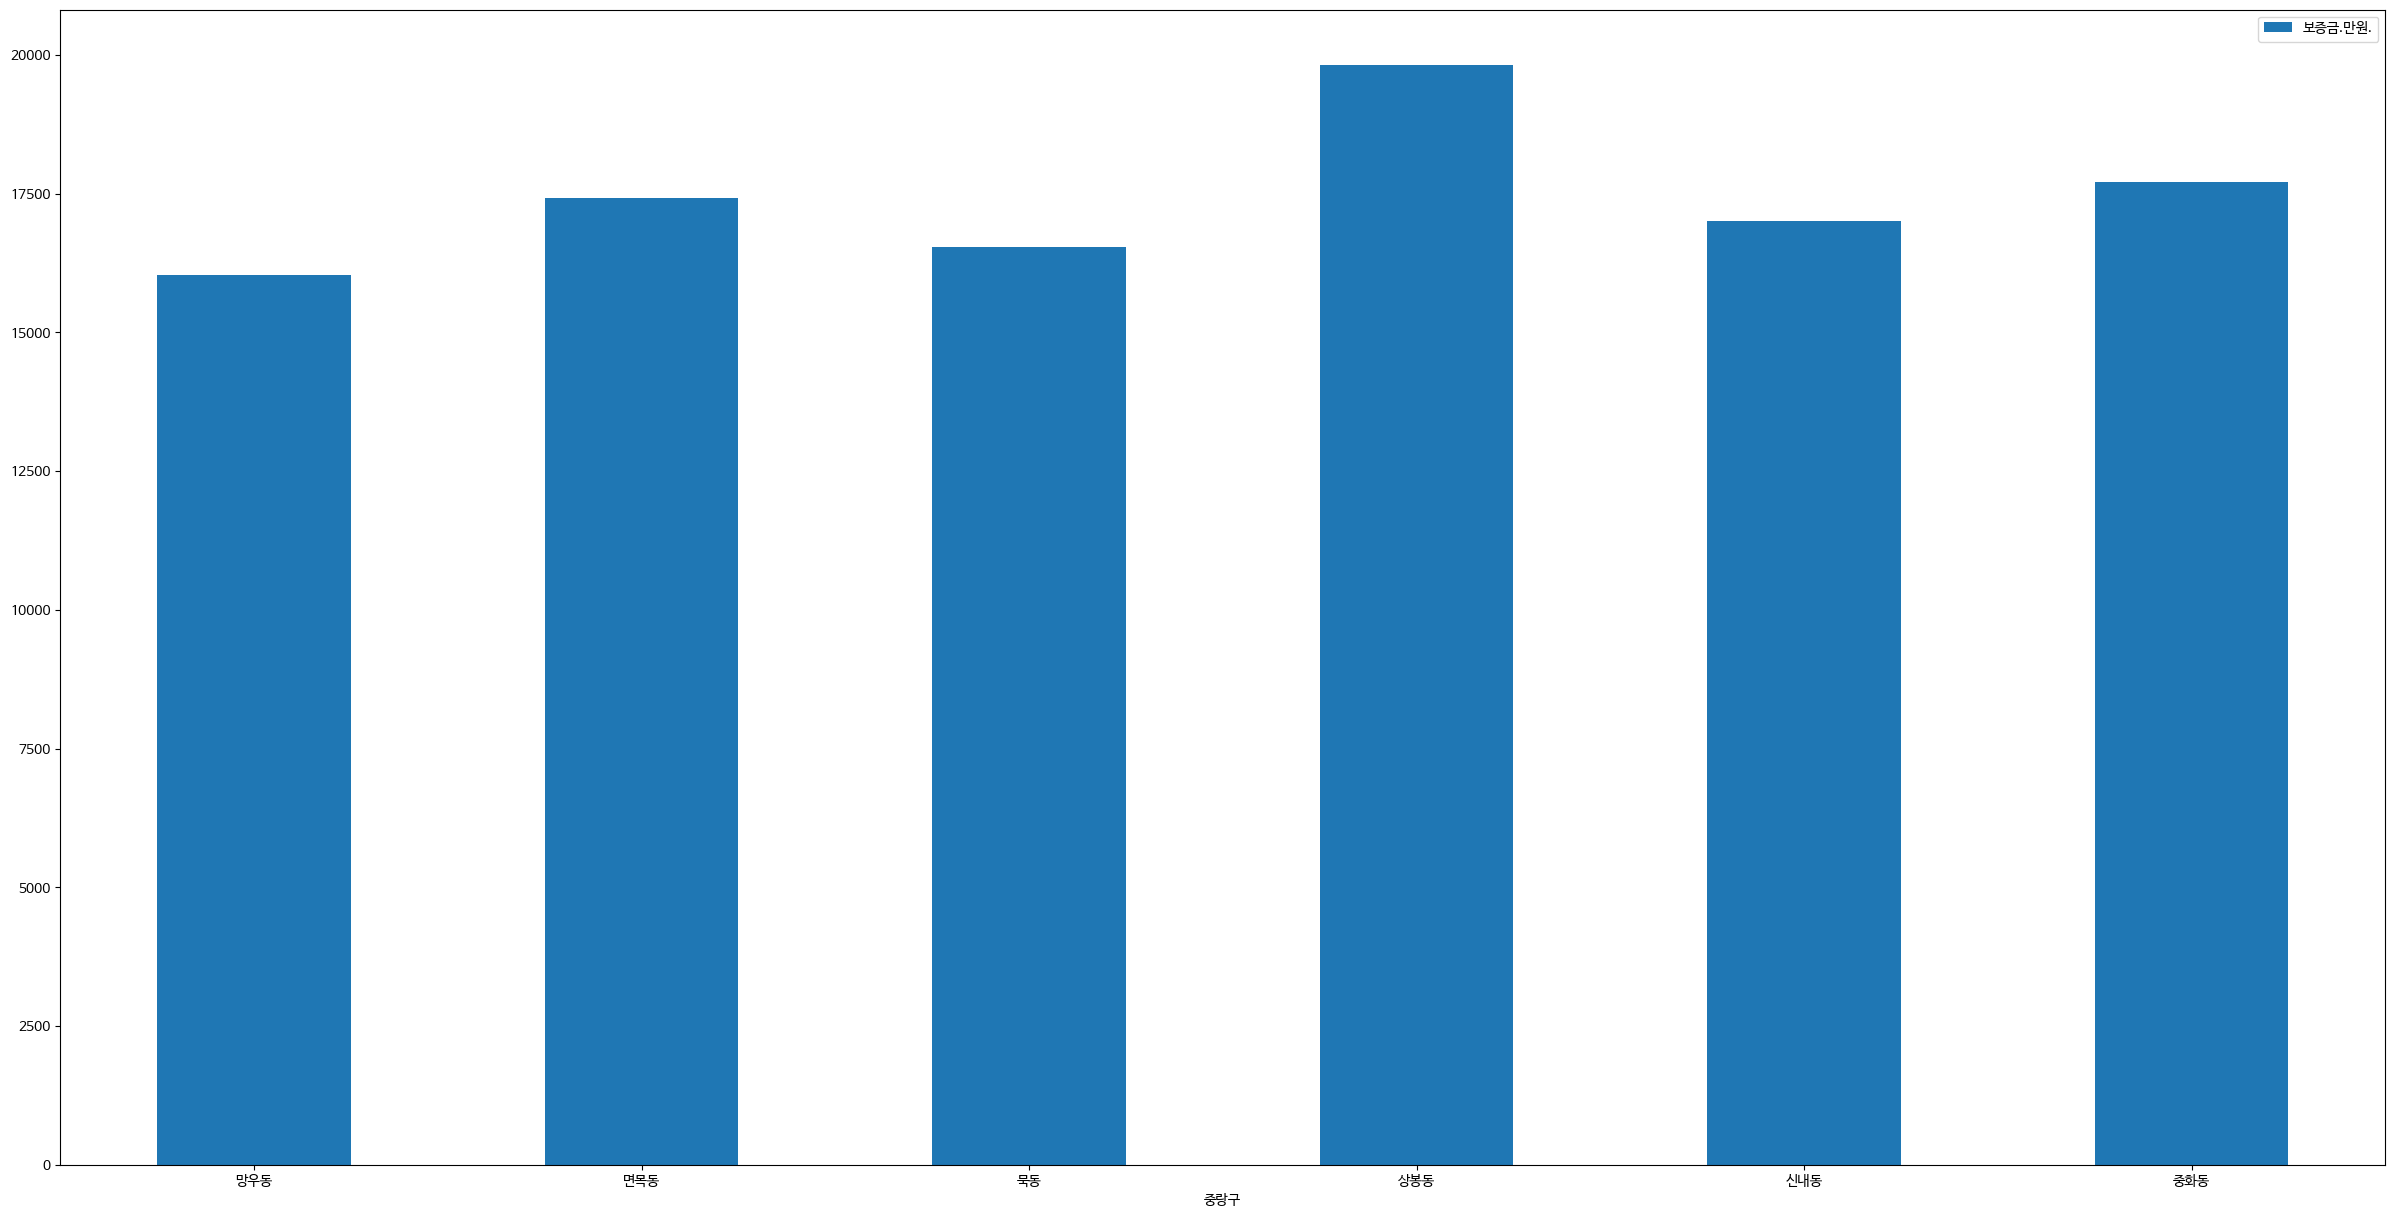

In [ ]:
SJ5 = sj25.groupby('법정동명').mean()
SJ5.plot(y=['보증금.만원.'], label=['보증금.만원.'],kind='bar', rot=0 , figsize=(30,15), xlabel = '중랑구')

In [ ]:
##############################################################################################################
################################### 아래는 월세데이터 #########################################

In [ ]:
SW1 = pd.read_csv("/content/drive/MyDrive/SeoulW")
SW1.drop(['Unnamed: 0'],axis=1, inplace = True) # 'Unnamed: 0' 열 제거해야함.
SW1.head()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
0,2023,동작구,사당동,13000,10,단독다가구,월세
1,2023,중랑구,면목동,2000,30,단독다가구,월세
2,2023,광진구,자양동,1000,60,단독다가구,월세
3,2023,송파구,풍납동,6000,30,단독다가구,월세
4,2023,강동구,명일동,500,35,단독다가구,월세


In [ ]:
SW1.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
SW2 = SW1[SW1['건물용도'] != '아파트']
SW2.shape
SW2.head()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
0,2023,동작구,사당동,13000,10,단독다가구,월세
1,2023,중랑구,면목동,2000,30,단독다가구,월세
2,2023,광진구,자양동,1000,60,단독다가구,월세
3,2023,송파구,풍납동,6000,30,단독다가구,월세
4,2023,강동구,명일동,500,35,단독다가구,월세


In [ ]:
SW3 = SW2.sort_values(by=['자치구명','법정동명'])
SW3.tail()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
251955,2023,중랑구,중화동,5000,75,연립다세대,월세
251982,2023,중랑구,중화동,3000,47,단독다가구,월세
252055,2023,중랑구,중화동,5000,60,연립다세대,월세
253022,2023,중랑구,중화동,300,36,단독다가구,월세
253474,2023,중랑구,중화동,500,45,단독다가구,월세


In [ ]:
SW3.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
SW4.head()

<ipython-input-18-95bd5ed9ed28>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SW4 = SW3.groupby('자치구명').mean()


<Axes: xlabel='서울 자치구'>

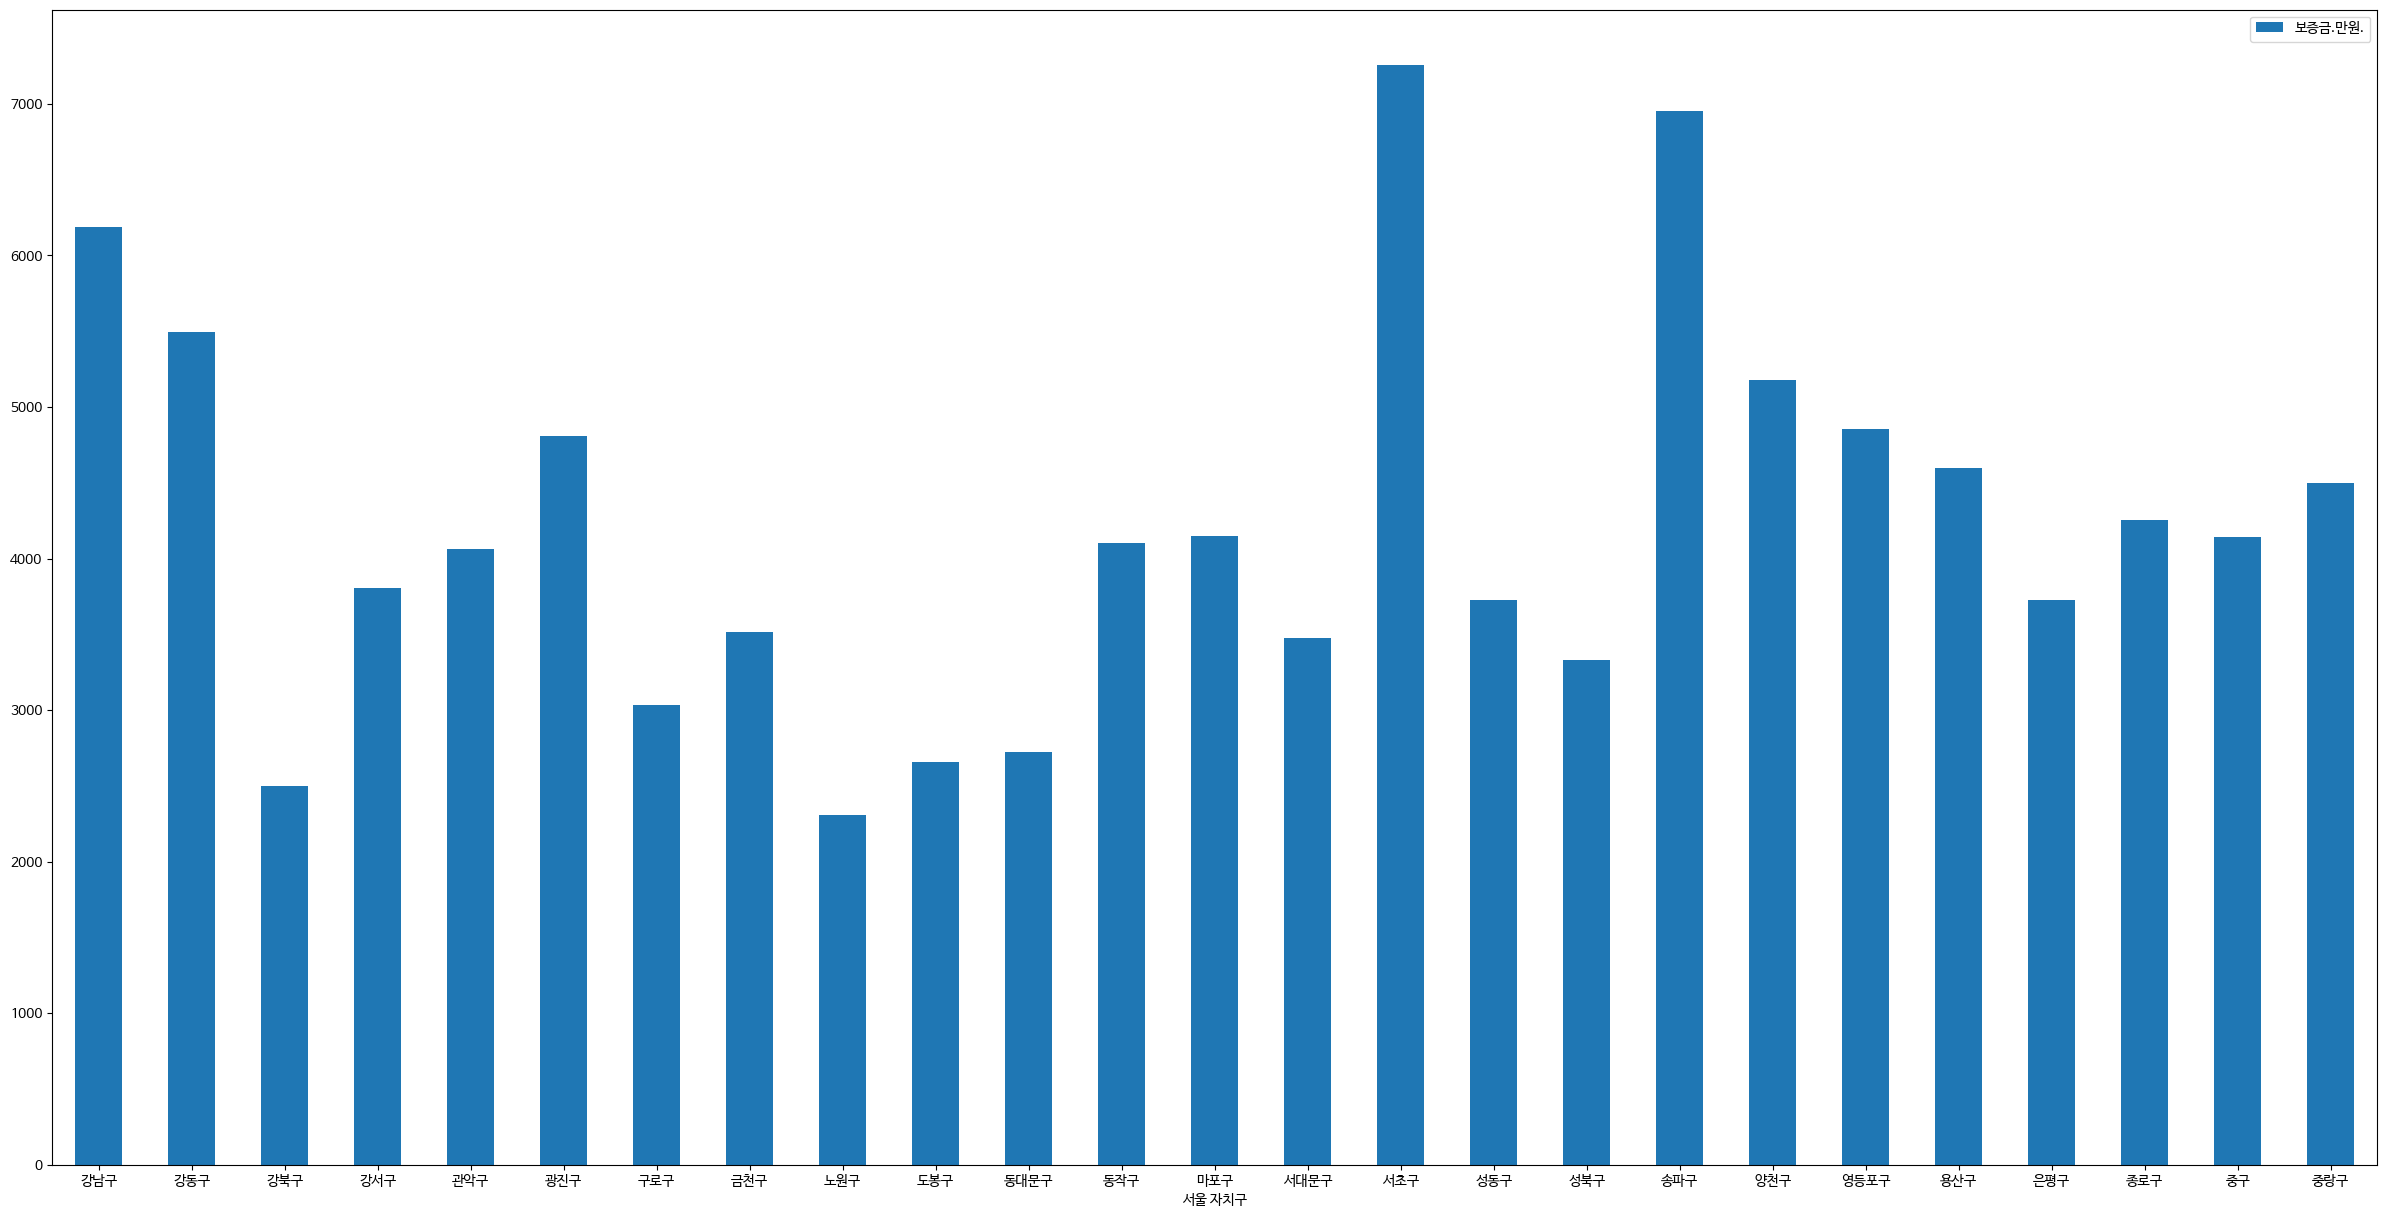

In [ ]:
SW4 = SW3.groupby('자치구명').mean()
SW4.plot(y=['보증금.만원.'], label=['보증금.만원.'],kind='bar', rot=0 , figsize=(30,15), xlabel ='서울 자치구')

In [ ]:
SW5 = SW3.groupby('자치구명').mean()
SW5.plot(y=['임대료.만원.'], label=['임대료.만원.'],kind='bar', rot=0 , figsize=(30,15), xlabel= '서울 자치구')

In [ ]:
sw1 = SW3[SW3['자치구명']=='강남구']
sw2 = SW3[SW3['자치구명']=='강동구']
sw3 = SW3[SW3['자치구명']=='강북구']
sw4 = SW3[SW3['자치구명']=='강서구']
sw5 = SW3[SW3['자치구명']=='관악구']
sw6 = SW3[SW3['자치구명']=='광진구']
sw7 = SW3[SW3['자치구명']=='구로구']
sw8 = SW3[SW3['자치구명']=='금천구']
sw9 = SW3[SW3['자치구명']=='노원구']
sw10 = SW3[SW3['자치구명']=='도봉구']
sw11 = SW3[SW3['자치구명']=='동대문구']
sw12 = SW3[SW3['자치구명']=='동작구']
sw13 = SW3[SW3['자치구명']=='마포구']
sw14 = SW3[SW3['자치구명']=='서대문구']
sw15 = SW3[SW3['자치구명']=='서초구']
sw16 = SW3[SW3['자치구명']=='성동구']
sw17 = SW3[SW3['자치구명']=='성북구']
sw18 = SW3[SW3['자치구명']=='송파구']
sw19 = SW3[SW3['자치구명']=='양천구']
sw20 = SW3[SW3['자치구명']=='영등포구']
sw21 = SW3[SW3['자치구명']=='용산구']
sw22 = SW3[SW3['자치구명']=='은평구']
sw23 = SW3[SW3['자치구명']=='종로구']
sw24 = SW3[SW3['자치구명']=='중구']
sw25 = SW3[SW3['자치구명']=='중랑구']

<ipython-input-20-42ac96b749b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SW6 = sw12.groupby('법정동명').mean()


<Axes: xlabel='동작구'>

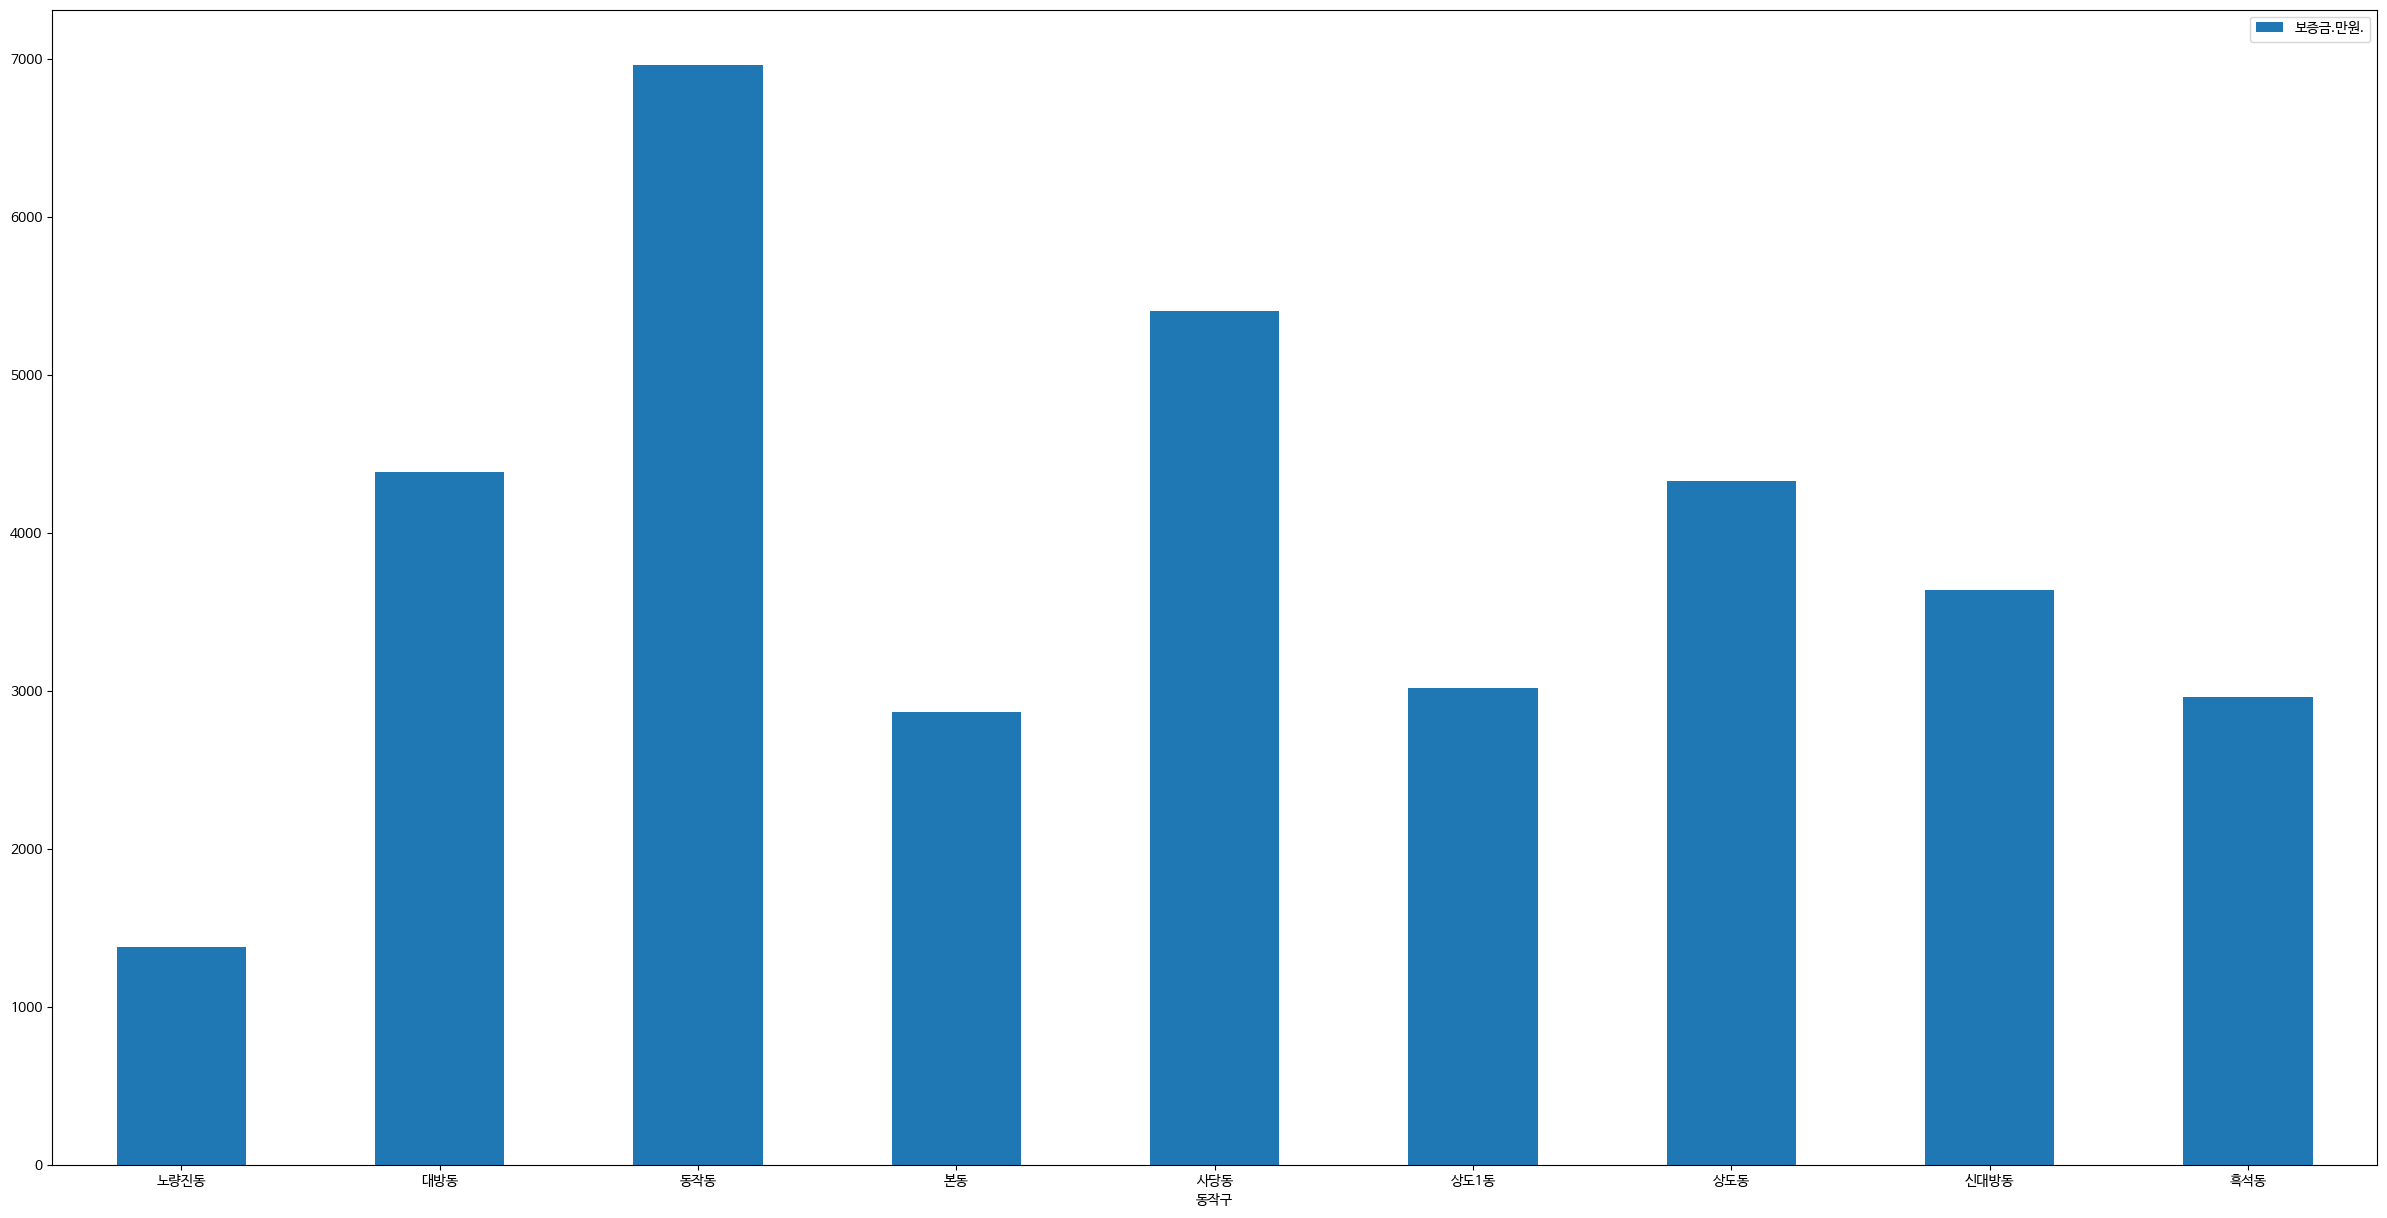

In [ ]:
SW6 = sw12.groupby('법정동명').mean()
SW6.plot(y=['보증금.만원.'], label=['보증금.만원.'],kind='bar', rot=0 , figsize=(30,15), xlabel='동작구')

<ipython-input-118-d022cd73baa3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SW7 = sw12.groupby('법정동명').mean()


<Axes: xlabel='동작구'>

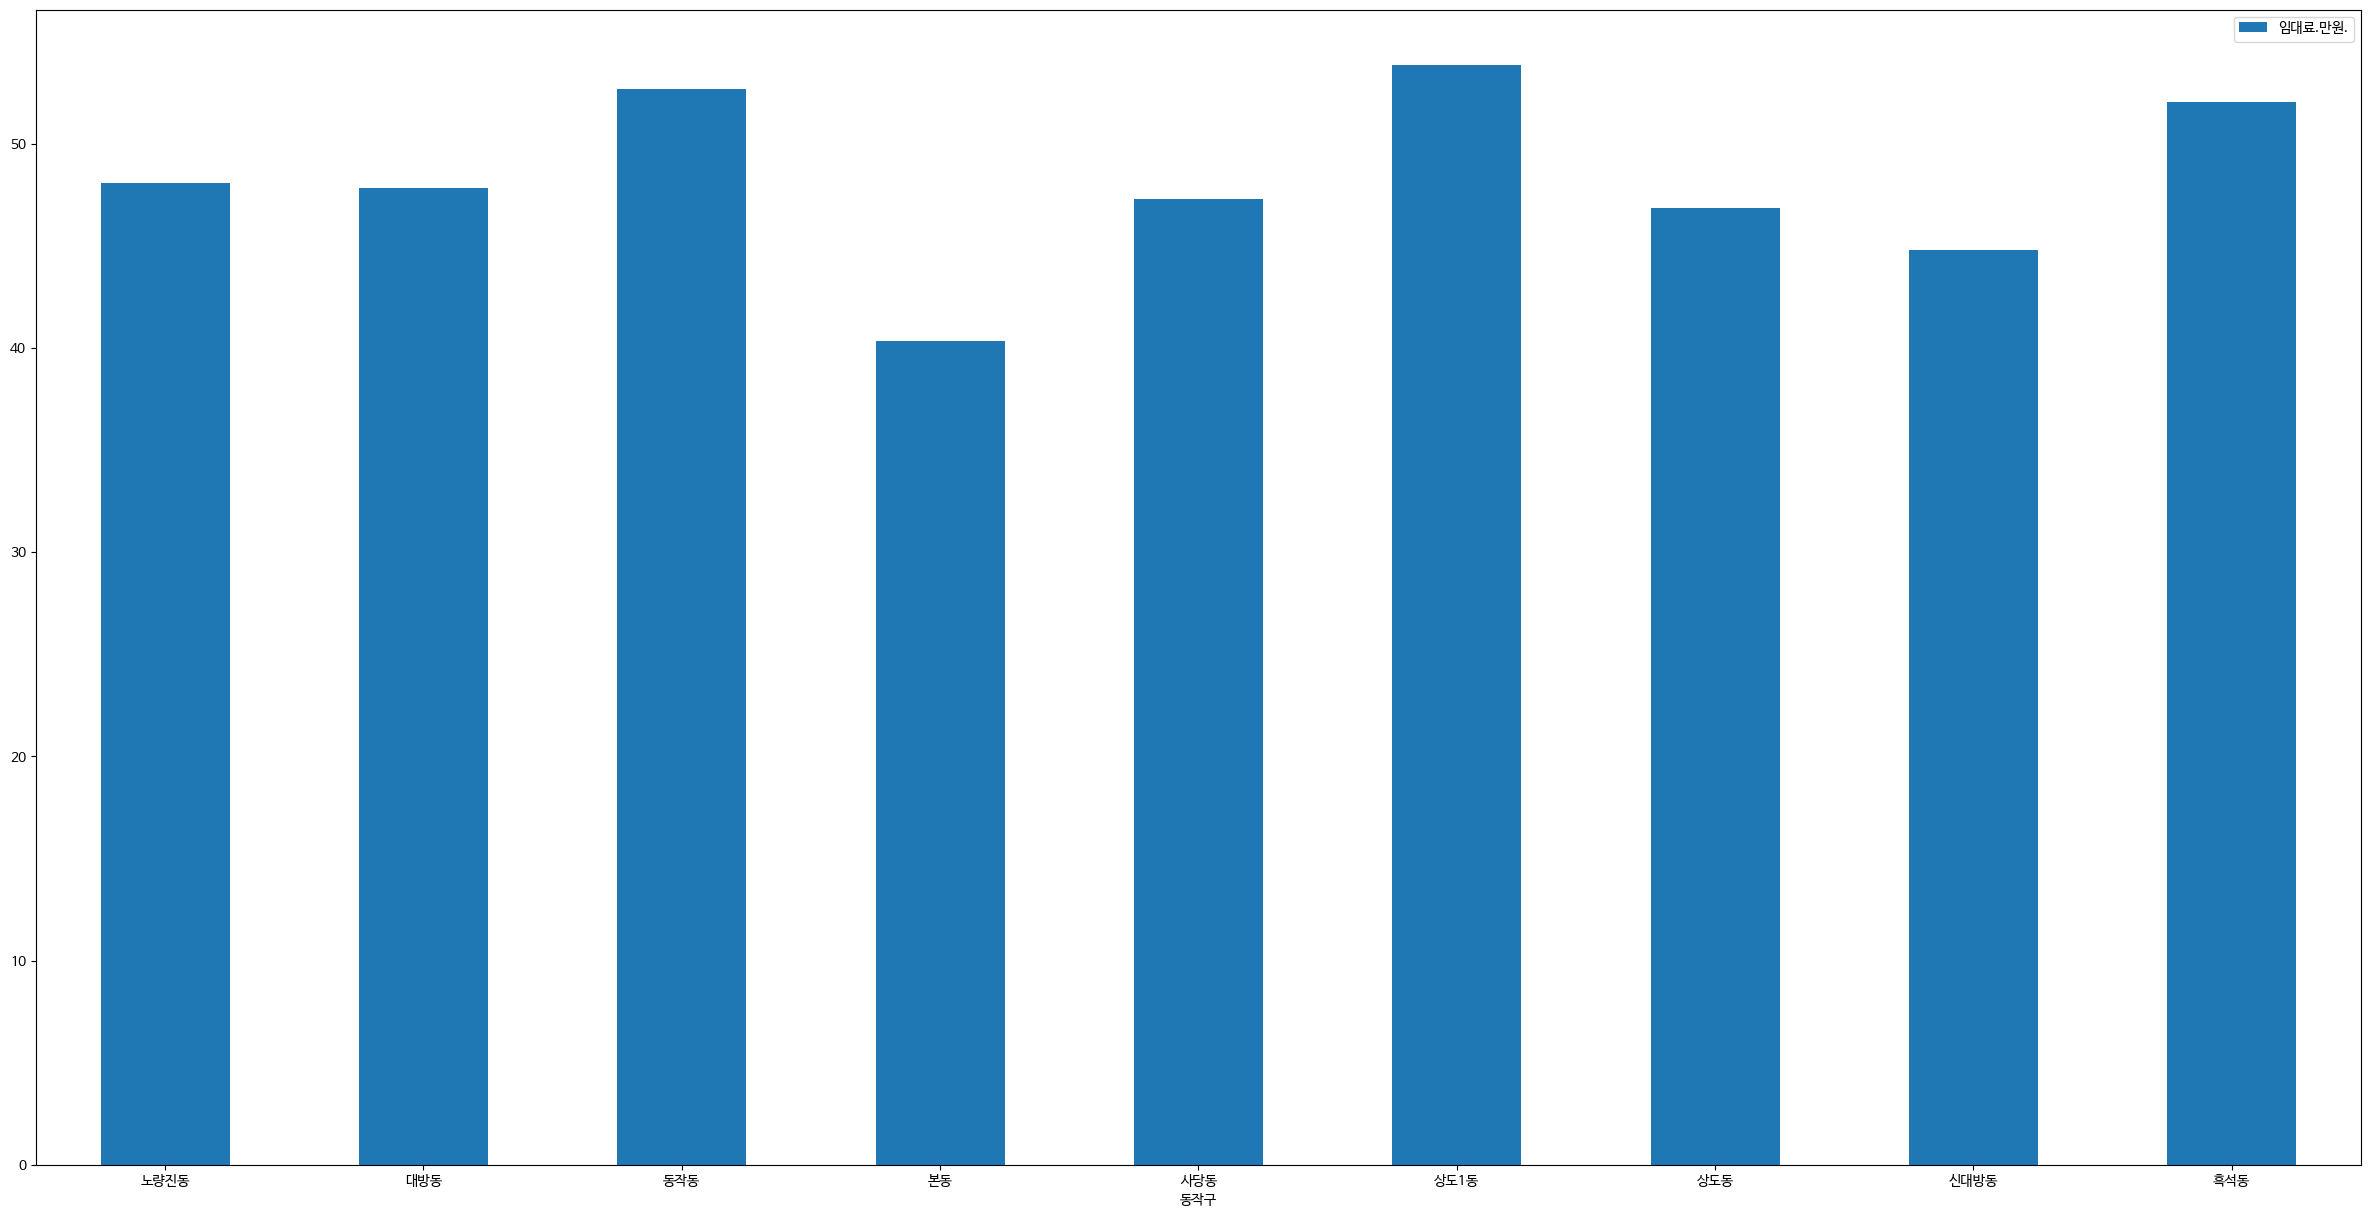

In [ ]:
SW7 = sw12.groupby('법정동명').mean()
SW7.plot(y=['임대료.만원.'], label=['임대료.만원.'],kind='bar', rot=0 , figsize=(30,15), xlabel= '동작구')

## 5. 서울시 실거래가 정보
### Seoul_real.csv

In [ ]:
SR1 = pd.read_csv("/content/drive/MyDrive/Seoul_real")
SR1.drop(['Unnamed: 0'],axis=1, inplace = True) # 'Unnamed: 0' 열 제거해야함.
SR1.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액.만원.,건물면적...,토지면적...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한.개업공인중개사.시군구명
0,2023,11545,금천구,10100,가산동,1.00000,대지,147.00000,6.00000,아이캐슬,...,25900,26.24000,14.04000,2.00000,NaN,NaN,2020.00000,연립다세대,직거래,NaN
1,2023,11560,영등포구,11500,당산동5가,1.00000,대지,9.00000,2.00000,당산 삼성쉐르빌,...,20000,22.95000,34.31000,11.00000,NaN,NaN,2013.00000,오피스텔,중개거래,서울 영등포구
2,2023,11650,서초구,10800,서초동,1.00000,대지,1542.00000,13.00000,서초에스알타워,...,22000,28.69000,38.32000,9.00000,NaN,NaN,2003.00000,오피스텔,중개거래,"경기 고양덕양구, 서울 서초구"
3,2023,11620,관악구,10100,봉천동,1.00000,대지,1518.00000,8.00000,한솔아트빌,...,35000,64.47000,26.73000,3.00000,NaN,NaN,2003.00000,연립다세대,중개거래,서울 관악구
4,2023,11740,강동구,10900,천호동,NaN,NaN,NaN,NaN,NaN,...,50000,140.50000,91.00000,NaN,NaN,NaN,1990.00000,단독다가구,중개거래,서울 광진구


In [ ]:
SR2 = SR1.sort_values(by=['자치구명','법정동명'])
SR2.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액.만원.,건물면적...,토지면적...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한.개업공인중개사.시군구명
553,2023,11680,강남구,10300,개포동,1.00000,대지,1262.00000,12.00000,골든빌A동,...,89500,57.11000,33.06000,4.00000,NaN,NaN,2022.00000,연립다세대,중개거래,서울 용산구
922,2023,11680,강남구,10300,개포동,1.00000,대지,1262.00000,13.00000,골든빌B동,...,54500,29.75000,19.83000,5.00000,NaN,NaN,2022.00000,연립다세대,중개거래,서울 용산구
1705,2023,11680,강남구,10300,개포동,1.00000,대지,1255.00000,2.00000,청담빌라,...,23750,38.78000,15.50000,-1.00000,NaN,NaN,1993.00000,연립다세대,중개거래,서울 강남구
1882,2023,11680,강남구,10300,개포동,1.00000,대지,1262.00000,12.00000,골든빌A동,...,89500,57.11000,33.06000,3.00000,NaN,NaN,2022.00000,연립다세대,중개거래,서울 용산구
2017,2023,11680,강남구,10300,개포동,1.00000,대지,13.00000,3.00000,대청타워,...,23000,31.91000,44.75000,13.00000,NaN,NaN,1997.00000,오피스텔,중개거래,서울 강남구


In [ ]:
SR2.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액.만원.', '건물면적...', '토지면적...', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한.개업공인중개사.시군구명'],
      dtype='object')

In [ ]:
SR2['건물용도'].unique()

array(['연립다세대', '오피스텔', '단독다가구'], dtype=object)

<ipython-input-74-fd2675c9da8c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SR3 = SR2.groupby('자치구명').mean()


<Axes: xlabel='서울 자치구'>

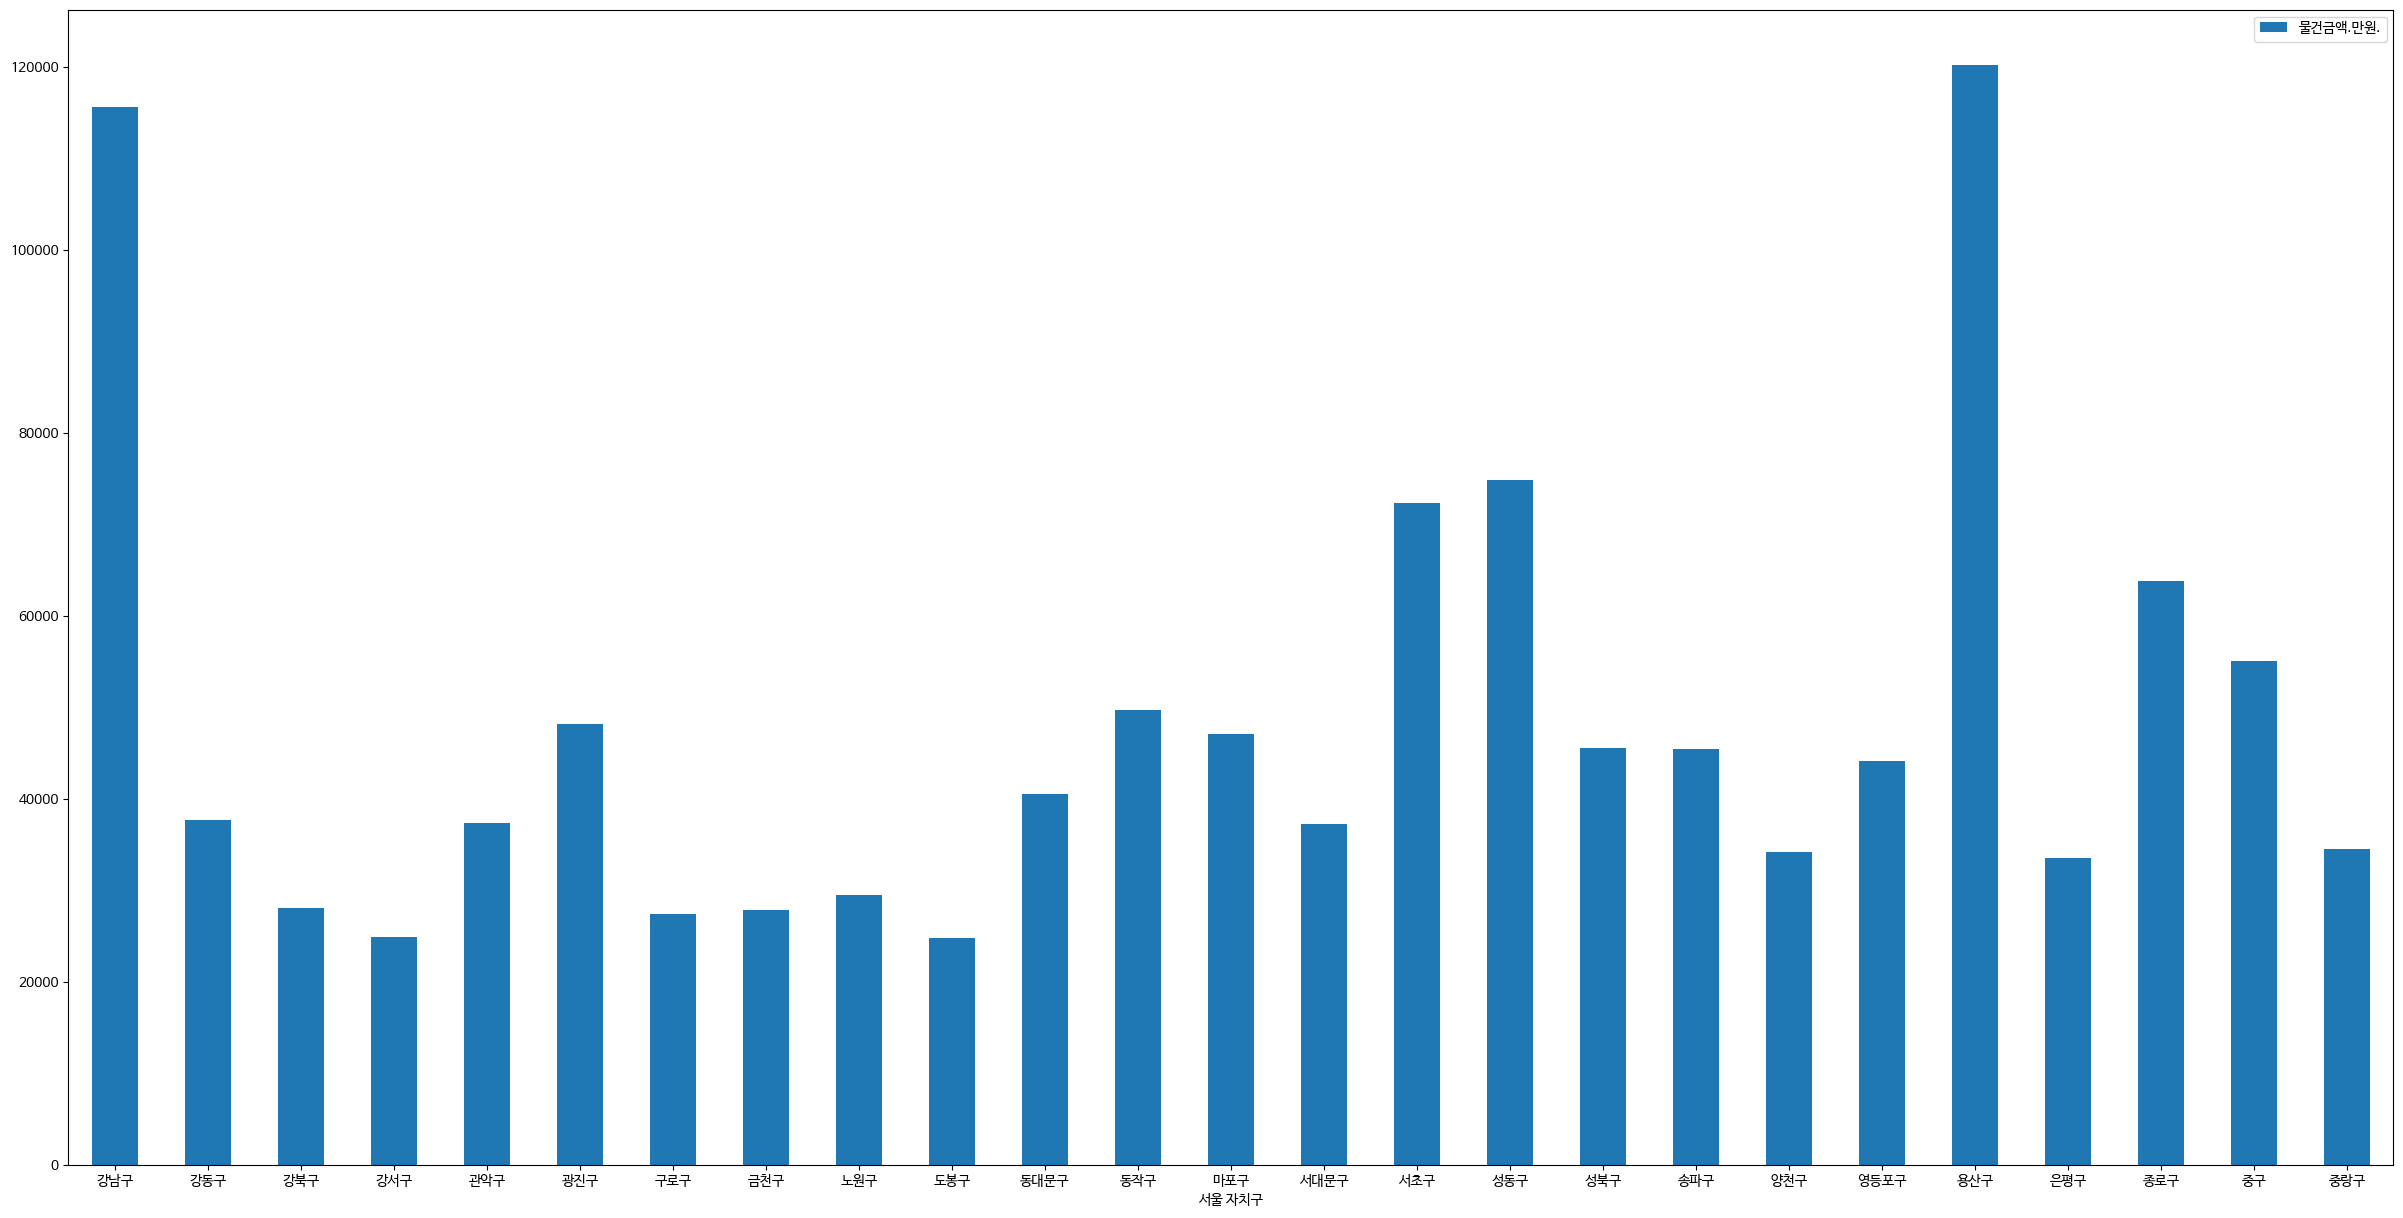

In [ ]:
SR3 = SR2.groupby('자치구명').mean()
SR3.plot(y=['물건금액.만원.'], label=['물건금액.만원.'],kind='bar', rot=0 , figsize=(30,15),xlabel = '서울 자치구')

In [ ]:
sr1 = SR2[SR2['자치구명']=='강남구']
sr2 = SR2[SR2['자치구명']=='강동구']
sr3 = SR2[SR2['자치구명']=='강북구']
sr4 = SR2[SR2['자치구명']=='강서구']
sr5 = SR2[SR2['자치구명']=='관악구']
sr6 = SR2[SR2['자치구명']=='광진구']
sr7 = SR2[SR2['자치구명']=='구로구']
sr8 = SR2[SR2['자치구명']=='금천구']
sr9 = SR2[SR2['자치구명']=='노원구']
sr10 = SR2[SR2['자치구명']=='도봉구']
sr11 = SR2[SR2['자치구명']=='동대문구']
sr12 = SR2[SR2['자치구명']=='동작구']
sr13 = SR2[SR2['자치구명']=='마포구']
sr14 = SR2[SR2['자치구명']=='서대문구']
sr15 = SR2[SR2['자치구명']=='서초구']
sr16 = SR2[SR2['자치구명']=='성동구']
sr17 = SR2[SR2['자치구명']=='성북구']
sr18 = SR2[SR2['자치구명']=='송파구']
sr19 = SR2[SR2['자치구명']=='양천구']
sr20 = SR2[SR2['자치구명']=='영등포구']
sr21 = SR2[SR2['자치구명']=='용산구']
sr22 = SR2[SR2['자치구명']=='은평구']
sr23 = SR2[SR2['자치구명']=='종로구']
sr24 = SR2[SR2['자치구명']=='중구']
sr25 = SR2[SR2['자치구명']=='중랑구']

In [ ]:
sr1[sr1['법정동명']=='신사동'].head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액.만원.,건물면적...,토지면적...,층,권리구분,취소일,건축년도,건물용도,신고구분,신고한.개업공인중개사.시군구명
51,2023,11680,강남구,10700,신사동,1.0,대지,595.0,8.0,현대빌라B,...,128000,83.34,76.00,2.0,NaN,NaN,1988.0,연립다세대,중개거래,서울 강남구
2113,2023,11680,강남구,10700,신사동,1.0,대지,555.0,34.0,(555-34),...,18000,25.17,18.09,2.0,NaN,NaN,2011.0,연립다세대,직거래,NaN
3969,2023,11680,강남구,10700,신사동,NaN,NaN,NaN,NaN,NaN,...,660000,419.48,182.20,NaN,NaN,NaN,1996.0,단독다가구,중개거래,서울 강남구
5243,2023,11680,강남구,10700,신사동,NaN,NaN,NaN,NaN,NaN,...,940000,482.64,188.70,NaN,NaN,NaN,1995.0,단독다가구,중개거래,서울 강남구
6947,2023,11680,강남구,10700,신사동,1.0,대지,520.0,10.0,대성빌리지,...,75000,54.45,33.27,4.0,NaN,NaN,2002.0,연립다세대,중개거래,서울 강남구


<ipython-input-77-49e86e36dfda>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SR4 = sr1.groupby('법정동명').mean()


<Axes: xlabel='강남구'>

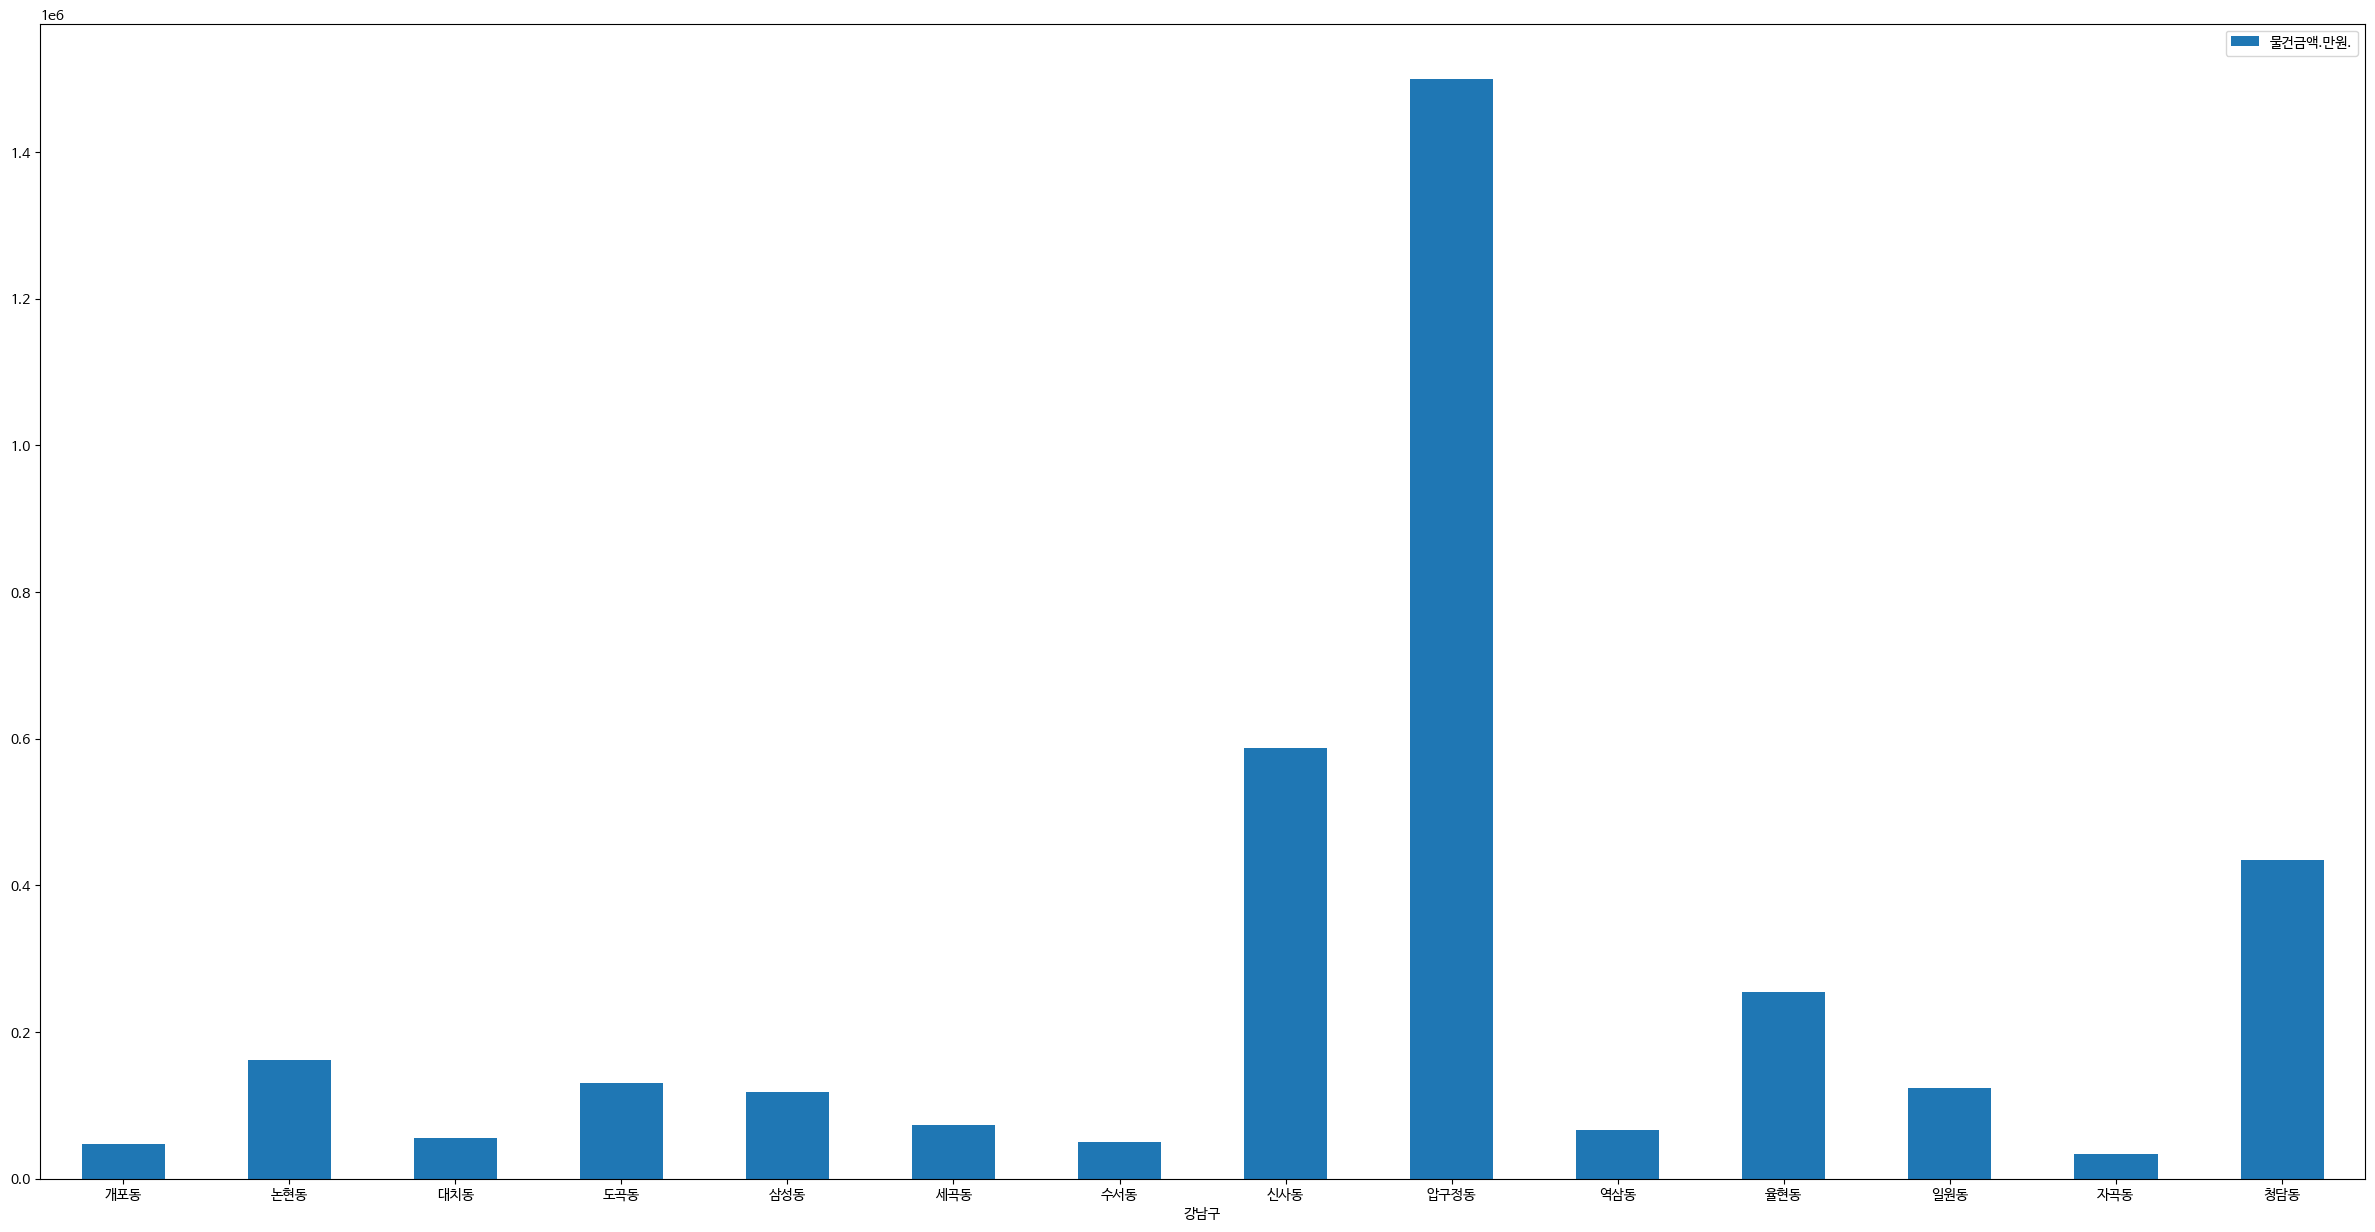

In [ ]:
SR4 = sr1.groupby('법정동명').mean()
SR4.plot(y=['물건금액.만원.'], label=['물건금액.만원.'],kind='bar', rot=0 , figsize=(30,15),xlabel = '강남구')

## 6. 시각화

### 6-1 전,월세 데이터 시각화

In [ ]:
SJ3.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
SW3.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
# 서울시 행정구역 경계 파일 로드 (GeoJSON 형식 사용)
s0 = gpd.read_file("/content/drive/MyDrive/seoul.geojson")

In [ ]:
s0.columns

Index(['OBJECTID', 'adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm',
       '자치구명', 'geometry', '법정동명'],
      dtype='object')

In [ ]:
s0['법정동명'] = s0['adm_nm'].str.extract(r'\b(\w+[동])\b')

# 열 이름 변경을 위한 딕셔너리 생성
column_mapping = {'sggnm': '자치구명'}

# 열 이름 변경 적용
s0 = s0.rename(columns=column_mapping)


# 결과 출력
print(s0)

     OBJECTID          adm_nm   adm_cd     adm_cd2    sgg sido sidonm 자치구명  \
0           1   서울특별시 종로구 사직동  1101053  1111053000  11110   11  서울특별시  종로구   
1           2   서울특별시 종로구 삼청동  1101054  1111054000  11110   11  서울특별시  종로구   
2           3   서울특별시 종로구 부암동  1101055  1111055000  11110   11  서울특별시  종로구   
3           4   서울특별시 종로구 평창동  1101056  1111056000  11110   11  서울특별시  종로구   
4           5   서울특별시 종로구 무악동  1101057  1111057000  11110   11  서울특별시  종로구   
..        ...             ...      ...         ...    ...  ...    ...  ...   
420       421  서울특별시 강동구 둔촌2동  1125071  1174070000  11740   11  서울특별시  강동구   
421       422  서울특별시 강동구 암사1동  1125072  1174057000  11740   11  서울특별시  강동구   
422       423  서울특별시 강동구 천호2동  1125073  1174061000  11740   11  서울특별시  강동구   
423       424    서울특별시 강동구 길동  1125074  1174068500  11740   11  서울특별시  강동구   
424      3479  서울특별시 구로구 오류2동  1117073  1153078000  11530   11  서울특별시  구로구   

                                              geometry  법정동명  


In [ ]:
s00 = ['sidonm','자치구명','법정동명','geometry']

In [ ]:
s0=s0[s00]

In [ ]:
s0.head()

,sidonm,자치구명,법정동명,geometry
0,서울특별시,종로구,사직동,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,서울특별시,종로구,삼청동,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,서울특별시,종로구,부암동,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,서울특별시,종로구,평창동,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,서울특별시,종로구,무악동,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [ ]:
s0['법정동명'].unique()

In [ ]:
SJ3.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

In [ ]:
SJ100.head()

,접수년도,보증금.만원.,임대료.만원.
자치구명,,,
강남구,2022.433488,28639.377421,0.036025
강동구,2022.432938,20806.220023,0.011464
강북구,2022.423291,14010.152031,0.000000
강서구,2022.407853,19505.256149,0.022249
관악구,2022.405885,15921.990601,0.005959


In [ ]:
SJ100 = SJ3.groupby(['자치구명','법정동명']).mean()
SW100 = SW3.groupby(['자치구명', '법정동명']).mean()

<ipython-input-26-c1caa086573d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SJ100 = SJ3.groupby(['자치구명','법정동명']).mean()
<ipython-input-26-c1caa086573d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SW100 = SW3.groupby(['자치구명', '법정동명']).mean()


In [ ]:
SJ0022 = SJ2[SJ2['자치구명']=='동작구']

In [ ]:
SJ0022['법정동명'].unique()

array(['신대방동', '노량진동', '상도동', '사당동', '대방동', '흑석동'], dtype=object)

In [ ]:
qwer123 = SJ2.groupby('법정동명').mean()
qwer123.tail()

<ipython-input-81-7d1a42f179b9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,접수년도,보증금.만원.,임대료.만원.
법정동명,,,
효창동,2023.00000,24097.19529,0.00000
후암동,2023.00000,22720.29167,0.00000
휘경동,2023.00000,13671.84146,0.00000
흑석동,2023.00000,17713.01075,0.00000
흥인동,2023.00000,21189.58333,0.00000


In [ ]:
SJ0022['법정동명'] = SJ0022['법정동명'].replace('동작동','사당동')
SJ0022['법정동명'] = SJ0022['법정동명'].replace('상도1동','상도동')
SJ0022['법정동명'] = SJ0022['법정동명'].replace('본동','노량진동')

In [ ]:
SW0023 = SW2[SW2['자치구명']=='동작구']

In [ ]:
SW0023['법정동명'].unique()

array(['사당동', '상도동', '신대방동', '대방동', '노량진동', '흑석동'], dtype=object)

In [ ]:
SW0023['법정동명'] = SW0023['법정동명'].replace('동작동','사당동')
SW0023['법정동명'] = SW0023['법정동명'].replace('상도1동','상도동')
SW0023['법정동명'] = SW0023['법정동명'].replace('본동','노량진동')

In [ ]:
s000=s0[s0['자치구명']=='동작구']

In [ ]:
s000['법정동명'] = s000['법정동명'].replace(['노량진1동','노량진2동'],'노량진동')
s000['법정동명'] = s000['법정동명'].replace(['상도1동','상도2동','상도3동','상도4동'],'상도동')
s000['법정동명'] = s000['법정동명'].replace(['사당1동','사당2동','사당3동','사당4동','사당5동'],'사당동')
s000['법정동명'] = s000['법정동명'].replace(['신대방1동','신대방2동'],'신대방동')

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# 법정동명으로 그룹 지어서 각 법정동명에 대해 첫 번째 geometry 값 가져오기
s001 = s000.groupby('법정동명')['geometry'].apply(lambda x: x.iloc[0]).reset_index()

In [ ]:
ss11

,법정동명,geometry,접수년도,보증금.만원.,임대료.만원.
0,노량진동,"MULTIPOLYGON (((126.94059 37.50598, 126.94055 ...",2023.00000,15651.74000,0.00000
1,대방동,"MULTIPOLYGON (((126.93304 37.51576, 126.93304 ...",2023.00000,19032.90000,0.00000
2,사당동,"MULTIPOLYGON (((126.98207 37.48481, 126.98181 ...",2023.00000,18860.71000,0.00000
3,상도동,"MULTIPOLYGON (((126.95398 37.50769, 126.95443 ...",2023.00000,18050.54000,0.00000
4,신대방동,"MULTIPOLYGON (((126.91597 37.48876, 126.91382 ...",2023.00000,16396.69000,0.00000
5,흑석동,"MULTIPOLYGON (((126.97559 37.51230, 126.97359 ...",2023.00000,17713.01000,0.00000


In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SJ0022 결합
SJ0022 = SJ0022.groupby('법정동명').mean()

ss11 = s001.merge(SJ0022, on='법정동명')
ss11['보증금.만원.']=ss11['보증금.만원.'].round(2)  # 보증금 부분 소수점 2번째자리까지 표기

# 서울 중심에 지도 초기화
seoul_map_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_map_center, zoom_start=10)


# 각 구에 막대그래프 표시
for idx, row in ss11.iterrows():
    folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x],
                  popup=f"{row['법정동명']} - '전세가' {row['보증금.만원.']} 만원",
                  icon=folium.Icon(color='red')).add_to(m)

# Folium 지도를 표시
m

<ipython-input-66-d6b2b56b6e6d>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
ss11

,법정동명,geometry,접수년도,보증금.만원.,임대료.만원.
0,노량진동,"MULTIPOLYGON (((126.94059 37.50598, 126.94055 ...",2023.00000,15651.74000,0.00000
1,대방동,"MULTIPOLYGON (((126.93304 37.51576, 126.93304 ...",2023.00000,19032.90000,0.00000
2,사당동,"MULTIPOLYGON (((126.98207 37.48481, 126.98181 ...",2023.00000,18860.71000,0.00000
3,상도동,"MULTIPOLYGON (((126.95398 37.50769, 126.95443 ...",2023.00000,18050.54000,0.00000
4,신대방동,"MULTIPOLYGON (((126.91597 37.48876, 126.91382 ...",2023.00000,16396.69000,0.00000
5,흑석동,"MULTIPOLYGON (((126.97559 37.51230, 126.97359 ...",2023.00000,17713.01000,0.00000


In [ ]:
SW0023.head()

,접수년도,자치구명,법정동명,보증금.만원.,임대료.만원.,건물용도,전월세구분
0,2023,동작구,사당동,13000,10,단독다가구,월세
7,2023,동작구,사당동,1000,54,단독다가구,월세
26,2023,동작구,상도동,2000,40,단독다가구,월세
37,2023,동작구,사당동,1000,40,단독다가구,월세
134,2023,동작구,신대방동,6649,24,연립다세대,월세


In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SW0023 결합 / 평균값 먼저 추출
SW0023 = SW0023.groupby('법정동명').mean()

ss11 = s001.merge(SW0023, on='법정동명')
ss11['보증금.만원.']=ss11['보증금.만원.'].round(2)
ss11['임대료.만원.']=ss11['임대료.만원.'].round(2) # 보증금 부분 소수점 2번째자리까지 표기

# 서울 중심에 지도 초기화
seoul_map_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_map_center, zoom_start=10)


# 각 구에 막대그래프 표시
for idx, row in ss11.iterrows():
    folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x],
                  popup=f"{row['법정동명']} - '보증금' {row['보증금.만원.']} 만원 / '월세' {row['임대료.만원.']} 만원",
                  icon=folium.Icon(color='red')).add_to(m)

# Folium 지도를 표시
m

In [ ]:
ss11.head()

In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SJ0022 결합 / 평균값 먼저 추출

SJ0022 = SJ0022.groupby('법정동명').mean()

ss11 = s000.merge(SJ0022, on='법정동명')
ss11['보증금.만원.']=ss11['보증금.만원.'].round(2)
ss11['임대료.만원.']=ss11['임대료.만원.'].round(2) # 보증금 부분 소수점 2번째자리까지 표기

# 서울시 지도 그리기
fig = px.choropleth_mapbox(ss11,
                           geojson=ss11.geometry,
                           locations=ss11.index,
                           color='보증금.만원.',
                           color_continuous_scale="oranges",
                           mapbox_style="carto-positron",
                           center={"lat": 37.5665, "lon": 126.9780},
                           zoom=10,
                           opacity=0.5,
                           hover_name='법정동명',
                           title='서울시 행정동별 전세 보증금 (만원)',
                          custom_data=['법정동명','보증금.만원.'],
                           )

# 각 동 중심에 금액을 텍스트로 표시
for _, row in ss11.iterrows():
    centroid = row['geometry'].centroid
    fig.add_annotation(
        x=centroid.x,
        y=centroid.y,
        text=f"{row['법정동명']} - '보증금' {row['보증금.만원.']} 만원",
        showarrow=False,
        font=dict(size=10)
        ,
    )

    fig.update_traces(
    hovertemplate="%{customdata[0]} <br> 보증금:%{customdata[1]} 만원"
)


# 그림 표시
fig.show()

<ipython-input-127-beb24f86c831>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SW0023 결합 / 평균값 먼저 추출

SW0023 = SW0023.groupby('법정동명').mean()

ss11 = s000.merge(SW0023, on='법정동명')
ss11['보증금.만원.']=ss11['보증금.만원.'].round(2)
ss11['임대료.만원.']=ss11['임대료.만원.'].round(2) # 보증금 부분 소수점 2번째자리까지 표기

# 서울시 지도 그리기
fig = px.choropleth_mapbox(ss11,
                           geojson=ss11.geometry,
                           locations=ss11.index,
                           color='보증금.만원.',
                           color_continuous_scale="oranges",
                           mapbox_style="carto-positron",
                           center={"lat": 37.5665, "lon": 126.9780},
                           zoom=10,
                           opacity=0.5,
                           hover_name='법정동명',
                           title='서울시 행정동별 월세 보증금 및 월세금액(만원)',
                           custom_data=['법정동명','보증금.만원.','임대료.만원.'],
                           )

# 각 동 중심에 금액을 텍스트로 표시
for _, row in ss11.iterrows():
    centroid = row['geometry'].centroid
    fig.add_annotation(
        x=centroid.x,
        y=centroid.y,
        text=f"{row['법정동명']} - '보증금' {row['보증금.만원.']} 만원 / '월세' {row['임대료.만원.']} 만원",
        showarrow=False,
        font=dict(size=10)
        ,
    )

    fig.update_traces(
    hovertemplate="%{customdata[0]} <br> 보증금:%{customdata[1]} 만원<br>월세:%{customdata[2]} 만원 "
)


# 그림 표시
fig.show()

In [ ]:
# s001 + SW0023 결합 / 평균값 먼저 추출

SW0023 = SW0023.groupby('법정동명').mean()

ss11 = s000.merge(SW0023, on='법정동명')
ss11['보증금.만원.']=ss11['보증금.만원.'].round(2)
ss11['임대료.만원.']=ss11['임대료.만원.'].round(2) # 보증금 부분 소수점 2번째자리까지 표기

# Folium 지도 초기화
seoul_map_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_map_center, zoom_start=12)

# 각 동 중심에 금액을 텍스트로 표시 (예시 코드, 실제 데이터에 맞게 수정 필요)
for _, row in ss11.iterrows():
    centroid = row['geometry'].centroid
    folium.CircleMarker(
        location=[centroid.y, centroid.x],
        radius=5,
        popup=f"{row['법정동명']} - '보증금' {row['보증금.만원.']} 만원 / '월세' {row['임대료.만원.']} 만원",
        color='blue',  # 마커 색상 설정
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# Folium 지도를 표시
m

In [ ]:
SJ3.columns
SW3.columns

Index(['접수년도', '자치구명', '법정동명', '보증금.만원.', '임대료.만원.', '건물용도', '전월세구분'], dtype='object')

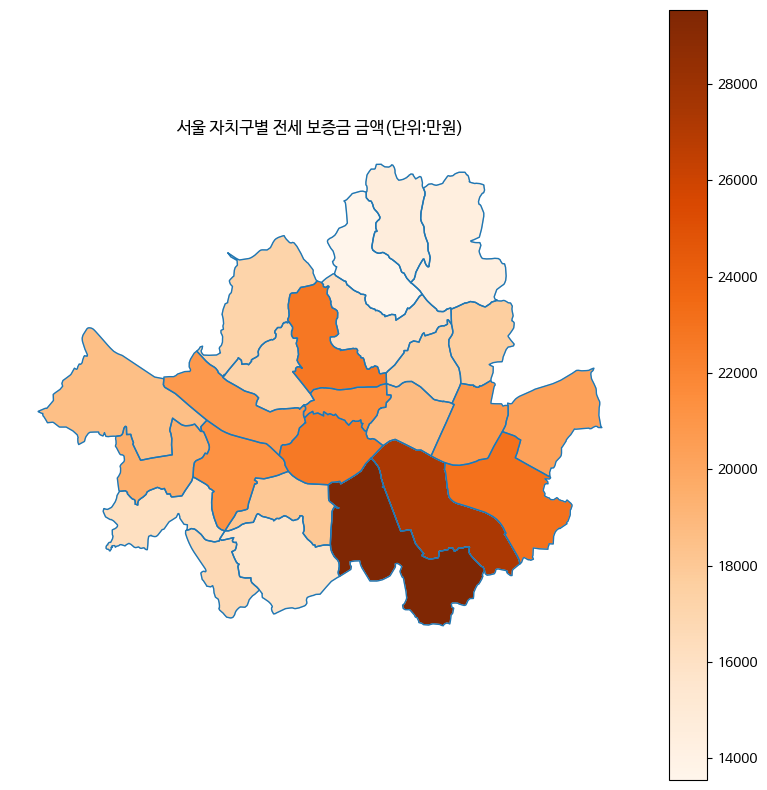

In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# SJ3 (전세 데이터) / SW3 (월세 데이터)
# s0 -> 지도 데이터
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SW0023 결합 / 평균값 먼저 추출

SJ3 = SJ3.groupby('자치구명').mean()

# 서울시 지도 데이터와 인구 데이터를 합친다.
ss123 = s0.merge(SJ3, on= '자치구명')

# 'sggnm'으로 그룹화하고 동 경계만 표시
ss20 = ss123.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
ss20.boundary.plot(ax=ax, linewidth=1)
ss20.plot(column='보증금.만원.', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 전세 보증금 금액(단위:만원)')

# 그래프를 표시한다.
plt.show()


<ipython-input-86-534061df3b16>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



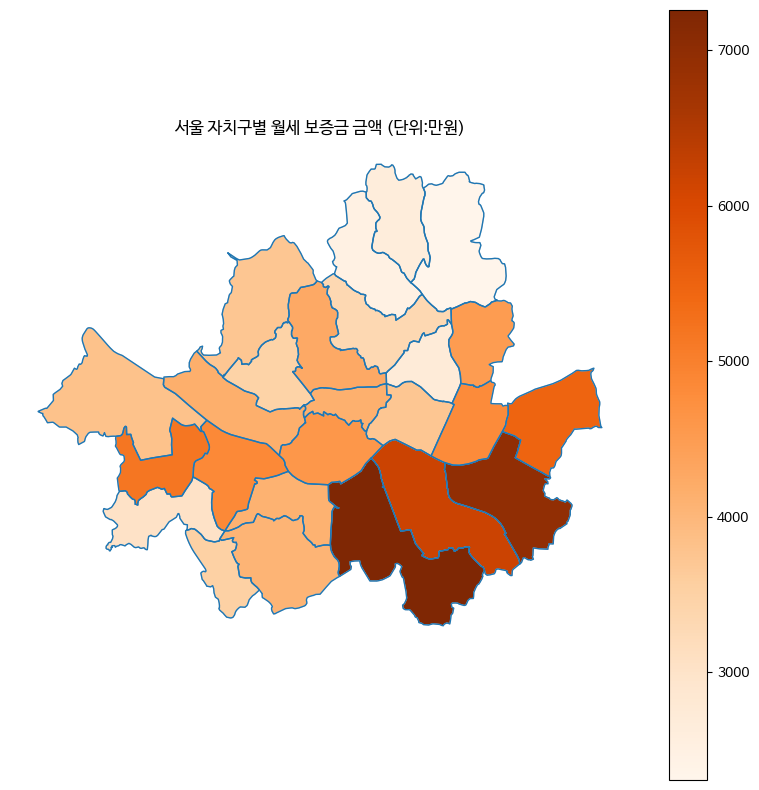

In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# SJ3 (전세 데이터) / SW3 (월세 데이터)
# s0 -> 지도 데이터
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SW0023 결합 / 평균값 먼저 추출

SW3 = SW3.groupby('자치구명').mean()

# 서울시 지도 데이터와 인구 데이터를 합친다.
ss123 = s0.merge(SW3, on= '자치구명')

# 'sggnm'으로 그룹화하고 동 경계만 표시
ss20 = ss123.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
ss20.boundary.plot(ax=ax, linewidth=1)
ss20.plot(column='보증금.만원.', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 월세 보증금 금액 (단위:만원)')

# 그래프를 표시한다.
plt.show()


In [ ]:
SW3.columns

Index(['접수년도', '보증금.만원.', '임대료.만원.'], dtype='object')

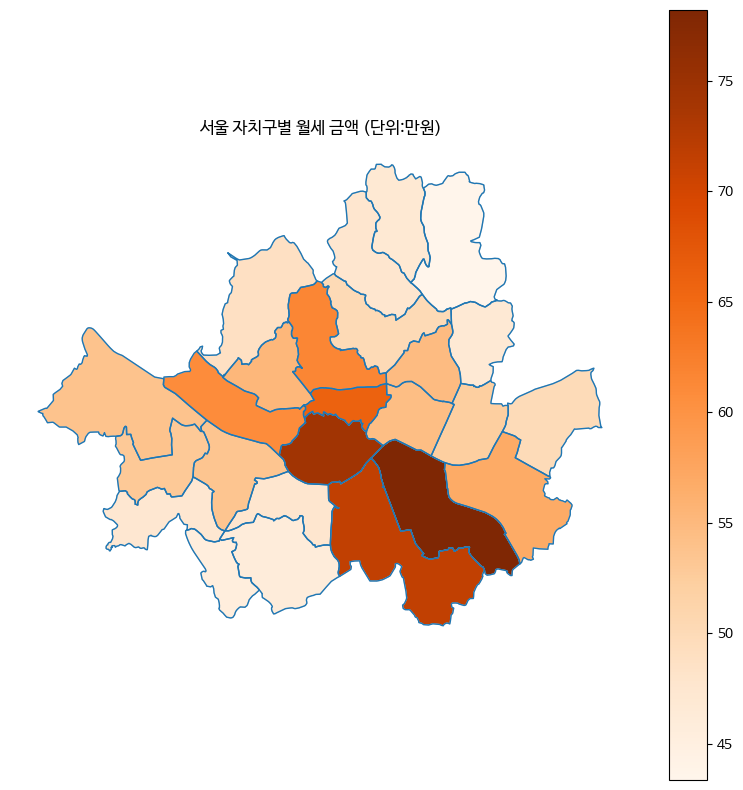

In [ ]:
# SJ0022 (전세 동작구 데이터) / SW0023 (월세 동작구 데이터) = 자치구명, 법정동명을 그룹화하여 평균값을 낸 것임.
# SJ3 (전세 데이터) / SW3 (월세 데이터)
# s0 -> 지도 데이터
# s001 -> 지도 데이터 (동작구 추출)

# s001 + SW0023 결합 / 평균값 먼저 추출

SW3 = SW3.groupby('자치구명').mean()

# 서울시 지도 데이터와 인구 데이터를 합친다.
ss123 = s0.merge(SW3, on= '자치구명')

# 'sggnm'으로 그룹화하고 동 경계만 표시
ss20 = ss123.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
ss20.boundary.plot(ax=ax, linewidth=1)
ss20.plot(column='임대료.만원.', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 월세 금액 (단위:만원)')

# 그래프를 표시한다.
plt.show()

## 6-2 부동산 면적 (총 면적/전용면적)

In [ ]:
PRM1= prop2.rename(columns={'SIGNGU_NM' : '자치구명','Dong': '법정동명','XU_DIMS' : '전용면적', 'LTOUT_DIMS' : '총면적'})

In [ ]:
PRM1.columns

Index(['SIGNLE', 'CTPR_NM', '자치구명', '법정동명', 'Bun', 'ESTT_CURPRC_SMNT_AMT',
       '전용면적', '총면적', 'LA', 'LO'],
      dtype='object')

In [ ]:
s0['자치구명'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [ ]:
PRM1['자치구명'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
PRM1['자치구명'] = PRM1['자치구명'].str.strip()

In [ ]:
PRM1['자치구명'] = PRM1['자치구명'].replace('영등포','영등포구')
PRM1['자치구명'] = PRM1['자치구명'].replace('서대문','서대문구')
PRM1['자치구명'] = PRM1['자치구명'].replace('동대문','동대문구')

In [ ]:
PR4['자치구명'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '마포구', '양천구', '강서구', '구로구', '금천구', '동작구', '관악구',
       '서초구', '강남구', '송파구', '강동구'], dtype=object)

<ipython-input-99-ee1d262ceff8>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



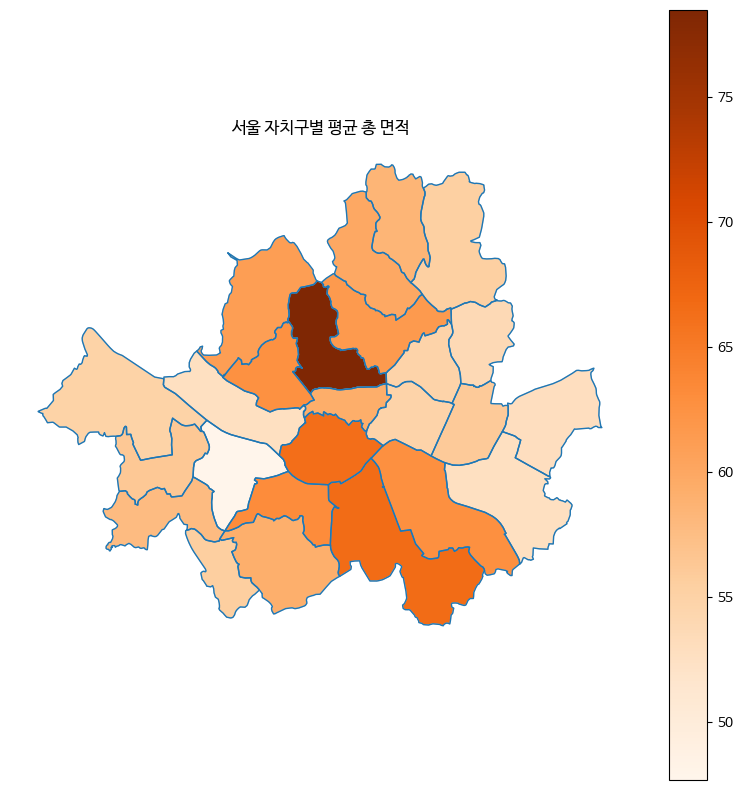

In [ ]:
# prop2 = 서울시 부동산 면적
# s0 -> 지도 데이터
# s001 -> 지도 데이터 (동작구 추출)

# s0 + prop2 결합 / 평균값 먼저 추출 / 소수점 두번째 자리까지 표기 / prop2에는 공백이 있어서 공백 제거해줘야함

PR3 = PRM1.groupby('자치구명').mean()

# 서울시 지도 데이터와 면적 데이터를 합친다.
PR4 = s0.merge(PR3,on='자치구명')

# '자치구명'으로 그룹화하고 동 경계만 표시
PR5 = PR4.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
PR5.boundary.plot(ax=ax, linewidth=1)
PR5.plot(column='총면적', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 평균 총 면적')

# 그래프를 표시한다.
plt.show()

<ipython-input-100-9168e14f36f6>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



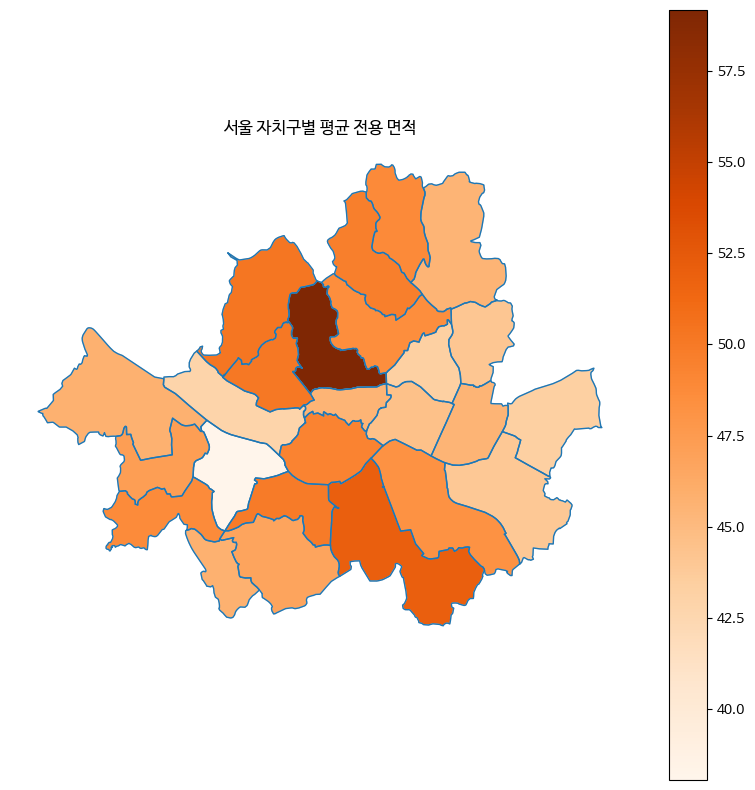

In [ ]:
# prop2 = 서울시 부동산 면적
# s0 -> 지도 데이터
# s001 -> 지도 데이터 (동작구 추출)

# s0 + prop2 결합 / 평균값 먼저 추출 / 소수점 두번째 자리까지 표기 / prop2에는 공백이 있어서 공백 제거해줘야함

PR3 = PRM1.groupby('자치구명').mean()

# 서울시 지도 데이터와 면적 데이터를 합친다.
PR4 = s0.merge(PR3,on='자치구명')

# '자치구명'으로 그룹화하고 동 경계만 표시
PR5 = PR4.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
PR5.boundary.plot(ax=ax, linewidth=1)
PR5.plot(column='전용면적', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 평균 전용 면적')

# 그래프를 표시한다.
plt.show()

In [ ]:
PRM2 = PRM1[PRM1['자치구명']=='동작구']

In [ ]:
PRM2['법정동명'] = PRM2['법정동명'].replace('동작동','사당동')
PRM2['법정동명'] = PRM2['법정동명'].replace('상도1동','상도동')
PRM2['법정동명'] = PRM2['법정동명'].replace('본동','노량진동')

In [ ]:
PRM2['법정동명'].unique()

array(['노량진동', '상도동', '흑석동', '사당동', '대방동', '신대방동'], dtype=object)

In [ ]:
PRM2.columns

Index(['SIGNLE', 'CTPR_NM', '자치구명', '법정동명', 'Bun', 'ESTT_CURPRC_SMNT_AMT',
       '전용면적', '총면적', 'LA', 'LO', '총면적(평)', '전용면적(평)'],
      dtype='object')

In [ ]:
PRM2.head()

,SIGNLE,CTPR_NM,자치구명,법정동명,Bun,ESTT_CURPRC_SMNT_AMT,전용면적,총면적,LA,LO,총면적(평),전용면적(평)
880184,11590 10100,서울특별시,동작구,노량진동,39-9번지,8252.63302,12.12000,15.51000,37.51259,126.93853,4.69178,3.66631
880185,11590 10100,서울특별시,동작구,노량진동,39-9번지,8252.63302,12.12000,15.51000,37.51259,126.93853,4.69178,3.66631
880186,11590 10100,서울특별시,동작구,노량진동,39-9번지,8252.63302,12.12000,15.55000,37.51259,126.93853,4.70388,3.66631
880187,11590 10100,서울특별시,동작구,노량진동,39-9번지,8252.63302,12.12000,15.51000,37.51259,126.93853,4.69178,3.66631
880188,11590 10100,서울특별시,동작구,노량진동,39-9번지,9164.82262,14.75000,18.87000,37.51259,126.93853,5.70818,4.46188


In [ ]:
# 제곱미터를 평으로 변환하는 함수 정의
def square_meter_to_pyung(square_meter):
    # 1평은 약 3.30578 제곱미터
    return square_meter / 3.30578

# '총 면적 (평)' 열에 변환된 값을 추가
PRM2['총면적(평)'] = PRM2['총면적'].apply(square_meter_to_pyung)
PRM2['전용면적(평)']=PRM2['전용면적'].apply(square_meter_to_pyung)

<ipython-input-105-19eb1efd0989>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-19eb1efd0989>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# PRM2 -> 동작구 데이터
# s000 -> 지도 데이터 (동작구 추출)

# s000 + SW0023 결합 / 평균값 먼저 추출

PRM2 = PRM2.groupby('법정동명').mean()

ss11 = s000.merge(PRM2, on='법정동명')
ss11['총면적']=ss11['총면적'].round(2)
ss11['전용면적']=ss11['전용면적'].round(2)
ss11['총면적(평)']=ss11['총면적(평)'].round(2)
ss11['전용면적(평)']=ss11['전용면적(평)'].round(2) # 총 면적, 전용 면적 부분 소수점 2번째자리까지 표기

# 서울시 지도 그리기
fig = px.choropleth_mapbox(ss11,
                           geojson=ss11.geometry,
                           locations=ss11.index,
                           color='전용면적',
                           color_continuous_scale="oranges",
                           mapbox_style="carto-positron",
                           center={"lat": 37.5665, "lon": 126.9780},
                           zoom=10,
                           opacity=0.5,
                           hover_name='법정동명',
                           title='동작구 행정동별 총면적 및 전용면적',
                           custom_data=['법정동명','총면적','총면적(평)','전용면적','전용면적(평)'],
                           )

# 각 동 중심에 금액을 텍스트로 표시
for _, row in ss11.iterrows():
    centroid = row['geometry'].centroid
    fig.add_annotation(
        x=centroid.x,
        y=centroid.y,
        showarrow=False,
        font=dict(size=10)
        ,
    )

    fig.update_traces(
    hovertemplate="%{customdata[0]} <br> 총면적:%{customdata[1]}(%{customdata[2]} 평) <br> 전용면적:%{customdata[3]} (%{customdata[4]} 평) "
)


# 그림 표시
fig.show()

In [ ]:
#s000['법정동명'] = s000['법정동명'].replace(['노량진1동','노량진2동'],'노량진동')
#s000['법정동명'] = s000['법정동명'].replace(['상도1동','상도2동','상도3동','상도4동'],'상도동')
#s000['법정동명'] = s000['법정동명'].replace(['사당1동','사당2동','사당3동','사당4동','사당5동'],'사당동')
#s000['법정동명'] = s000['법정동명'].replace(['신대방1동','신대방2동'],'신대방동')

## 6-3 부동산시세평가금액 및 공동주택공시가격

In [ ]:
propm2.columns

Index(['SIGNLE', 'CTPR_NM', 'SIGNGU_NM', 'Dong', 'Bun', 'APHUS_POTVALE',
       'ESTT_CURPRC_SMNT_AMT', 'XU_DIMS', 'LA', 'LO'],
      dtype='object')

In [ ]:
PRR1=propm2.rename(columns={'SIGNGU_NM' : '자치구명','Dong': '법정동명','APHUS_POTVALE' : '공동주택공시가격', 'ESTT_CURPRC_SMNT_AMT' : '부동산시세평가금액'})

In [ ]:
PRR1['자치구명'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
PRR1['자치구명'] = PRR1['자치구명'].str.strip()

In [ ]:
PRR1['자치구명'] = PRR1['자치구명'].replace('영등포','영등포구')
PRR1['자치구명'] = PRR1['자치구명'].replace('서대문','서대문구')
PRR1['자치구명'] = PRR1['자치구명'].replace('동대문','동대문구')

In [ ]:
# 만원 단위로 변환하는 함수 정의
def to_ten_thousand_won(value):
    return value / 10000

# '금액' 열의 값을 만원 단위로 변환
PRR1['공동주택공시가격'] = PRR1['공동주택공시가격'].apply(to_ten_thousand_won)
PRR1['부동산시세평가금액'] = PRR1['부동산시세평가금액'].apply(to_ten_thousand_won)

In [ ]:
PRR1.head()

,SIGNLE,CTPR_NM,자치구명,법정동명,Bun,공동주택공시가격,부동산시세평가금액,XU_DIMS,LA,LO
63,11680 10100,서울특별시,강남구,역삼동,817-25번지,17700.00000,26172.72385,20.70000,37.50026,127.02875
64,11680 10100,서울특별시,강남구,역삼동,817-25번지,18100.00000,26764.19784,20.70000,37.50026,127.02875
65,11680 10100,서울특별시,강남구,역삼동,817-25번지,17700.00000,26172.72385,20.70000,37.50026,127.02875
66,11680 10100,서울특별시,강남구,역삼동,817-25번지,17700.00000,26172.72385,20.70000,37.50026,127.02875
67,11680 10100,서울특별시,강남구,역삼동,817-25번지,18100.00000,26764.19784,20.70000,37.50026,127.02875


<ipython-input-116-ed07883b66d2>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



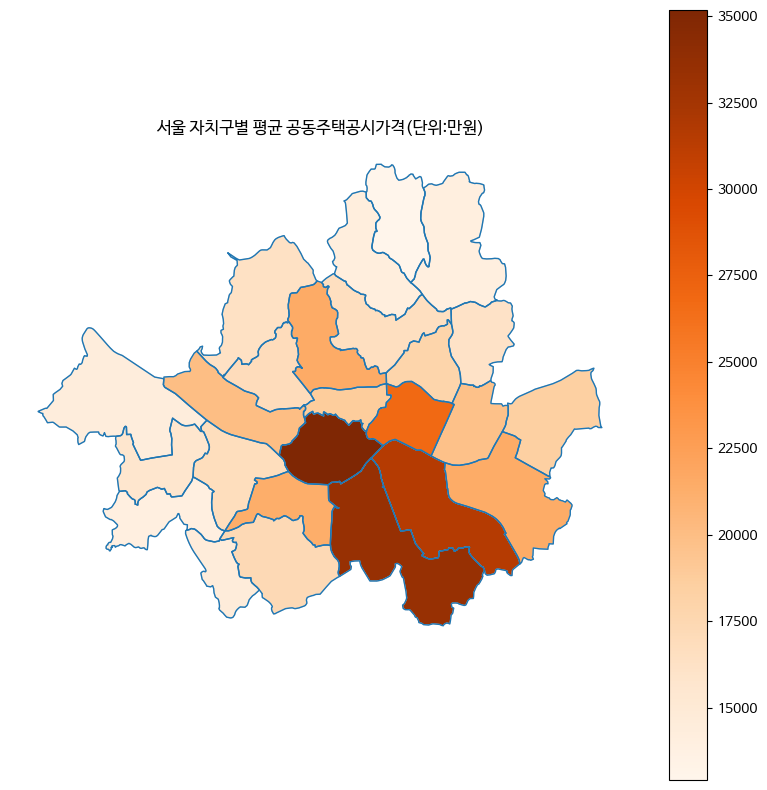

In [ ]:
# propm2 = 서울시 부동산 면적
# s0 -> 지도 데이터
# s000 -> 지도 데이터 (동작구 추출)

# s0 + propm2 결합 / 평균값 먼저 추출 / 소수점 두번째 자리까지 표기 / propm2에는 공백이 있어서 공백 제거해줘야함

PRR3 = PRR1.groupby('자치구명').mean()
PRR3['공동주택공시가격'] = PRR3['공동주택공시가격'].round(2)
PRR3['부동산시세평가금액'] = PRR3['부동산시세평가금액'].round(2)

# 서울시 지도 데이터와 면적 데이터를 합친다.
PRR4 = s0.merge(PRR3,on='자치구명')

# '자치구명'으로 그룹화하고 동 경계만 표시
PRR5 = PRR4.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
PRR5.boundary.plot(ax=ax, linewidth=1)
PRR5.plot(column='공동주택공시가격', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 평균 공동주택공시가격(단위:만원)')

# 그래프를 표시한다.
plt.show()

<ipython-input-118-22d719e901e5>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



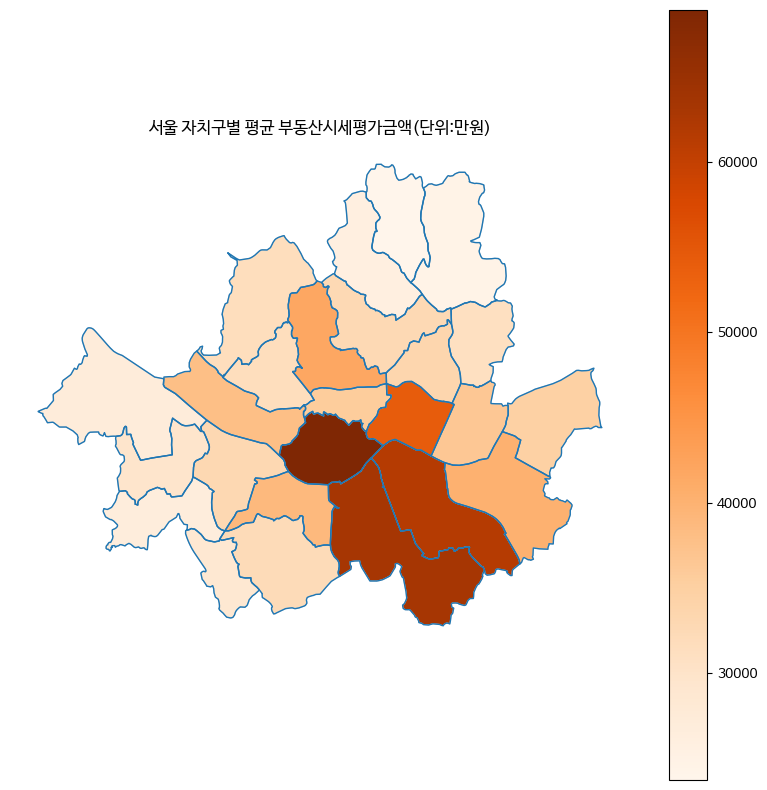

In [ ]:
# propm2 = 서울시 부동산 면적
# s0 -> 지도 데이터
# s000 -> 지도 데이터 (동작구 추출)

# s0 + propm2 결합 / 평균값 먼저 추출 / 소수점 두번째 자리까지 표기 / propm2에는 공백이 있어서 공백 제거해줘야함

PRR3 = PRR1.groupby('자치구명').mean()
PRR3['공동주택공시가격'] = PRR3['공동주택공시가격'].round(2)
PRR3['부동산시세평가금액'] = PRR3['부동산시세평가금액'].round(2)

# 서울시 지도 데이터와 면적 데이터를 합친다.
PRR4 = s0.merge(PRR3,on='자치구명')

# '자치구명'으로 그룹화하고 동 경계만 표시
PRR5 = PRR4.dissolve(by='자치구명', aggfunc='first')

# 서울시 지도 데이터를 시각화한다.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 그룹화된 데이터의 경계를 그리기
PRR5.boundary.plot(ax=ax, linewidth=1)
PRR5.plot(column='부동산시세평가금액', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  missing_kwds={'color': 'white', 'edgecolor': 'black', 'hatch': '///'})

# 라벨 제거
ax.set_axis_off()

# 그래프에 제목을 추가한다.
plt.title('서울 자치구별 평균 부동산시세평가금액(단위:만원)')

# 그래프를 표시한다.
plt.show()

In [ ]:
PRR00 = PRR1[PRR1['자치구명']=='동작구']

In [ ]:
PRR00['법정동명'].unique()

array(['노량진동', '상도동', '노량진', '흑석동', '사당동', '대방동', '신대방동'], dtype=object)

In [ ]:
PRR00['법정동명'] = PRR00['법정동명'].replace('동작동','사당동')
PRR00['법정동명'] = PRR00['법정동명'].replace('상도1동','상도동')
PRR00['법정동명'] = PRR00['법정동명'].replace('본동','노량진')

In [ ]:
# PRR00 -> 동작구 데이터
# s000 -> 지도 데이터 (동작구 추출)

# s000 + SW0023 결합 / 평균값 먼저 추출

PRR22 = PRR00.groupby('법정동명').mean()

PRR33 = s000.merge(PRR22, on='법정동명')
PRR33['공동주택공시가격'] = PRR33['공동주택공시가격'].round(2)
PRR33['부동산시세평가금액'] = PRR33['부동산시세평가금액'].round(2) # 총 면적, 전용 면적 부분 소수점 2번째자리까지 표기

# 서울시 지도 그리기
fig = px.choropleth_mapbox(PRR33,
                           geojson=PRR33.geometry,
                           locations=PRR33.index,
                           color='부동산시세평가금액',
                           color_continuous_scale="oranges",  # 색상 스케일 지정
                           mapbox_style="carto-positron",
                           center={"lat": 37.5665, "lon": 126.9780},
                           zoom=10,
                           opacity=0.5,
                           hover_name='법정동명',
                           title='동작구 행정동별 부동산시세평가금액 및 공동주택공시가격',
                           custom_data=['법정동명','부동산시세평가금액','공동주택공시가격' ],
                           )

# 각 동 중심에 금액을 텍스트로 표시
for _, row in PRR33.iterrows():
    centroid = row['geometry'].centroid
    fig.add_annotation(
        x=centroid.x,
        y=centroid.y,
        showarrow=False,
        font=dict(size=10)
        ,
    )

    fig.update_traces(
    hovertemplate="%{customdata[0]} <br> 부동산시세평가금액:%{customdata[1]} 만원 <br> 공동주택공시가격:%{customdata[2]} 만원"
)


# 그림 표시
fig.show()

<ipython-input-124-ac6ab1d712cb>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

